# Vaccination Data Analysis and Visualization

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

## Load Data

### data1 - coverage-data

In [114]:
coverage_data = pd.read_excel("coverage-data.xlsx")

In [116]:
coverage_data.head()

,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,ADMIN,Administrative coverage,NaN,NaN,NaN
1,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,OFFICIAL,Official coverage,NaN,NaN,NaN
2,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.52
3,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,NaN,NaN,90.52
4,COUNTRIES,ABW,Aruba,2023.0,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219.0,1008.0,82.69


In [118]:
coverage_data.shape

(399859, 11)

In [120]:
coverage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399859 entries, 0 to 399858
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   GROUP                          399859 non-null  object 
 1   CODE                           399858 non-null  object 
 2   NAME                           398584 non-null  object 
 3   YEAR                           399858 non-null  float64
 4   ANTIGEN                        399858 non-null  object 
 5   ANTIGEN_DESCRIPTION            399858 non-null  object 
 6   COVERAGE_CATEGORY              399858 non-null  object 
 7   COVERAGE_CATEGORY_DESCRIPTION  399858 non-null  object 
 8   TARGET_NUMBER                  79030 non-null   float64
 9   DOSES                          79327 non-null   float64
 10  COVERAGE                       230477 non-null  float64
dtypes: float64(4), object(7)
memory usage: 33.6+ MB


### Data Cleaning

In [122]:
coverage_data.isnull().sum()

GROUP                                 0
CODE                                  1
NAME                               1275
YEAR                                  1
ANTIGEN                               1
ANTIGEN_DESCRIPTION                   1
COVERAGE_CATEGORY                     1
COVERAGE_CATEGORY_DESCRIPTION         1
TARGET_NUMBER                    320829
DOSES                            320532
COVERAGE                         169382
dtype: int64

In [124]:
coverage_data.tail()

,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
399854,WHO_REGIONS,WPR,Western Pacific Region,1980.0,MCV1,"Measles-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588.0,1209026.0,4.0
399855,WHO_REGIONS,WPR,Western Pacific Region,1980.0,PAB,Protection at birth (PAB) against neonatal tet...,PAB,PAB Estimates,4494513.0,276306.0,6.0
399856,WHO_REGIONS,WPR,Western Pacific Region,1980.0,POL3,"Polio, 3rd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588.0,1296611.0,5.0
399857,WHO_REGIONS,WPR,Western Pacific Region,1980.0,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588.0,40245.0,0.0
399858,Created: 2025-02-01 16:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# dropping all rows NaN
coverage_data = coverage_data.drop(index=399858)

In [64]:
#target_mean = coverage_data['TARGET_NUMBER'].mean()
#coverage_data['TARGET_NUMBER'] = coverage_data['TARGET_NUMBER'].fillna(target_mean)
#does_mean = coverage_data['DOSES'].mean()
#coverage_data['DOSES'] = coverage_data['DOSES'].fillna(does_mean)

In [128]:
# Filling missing values
coverage_data.update(coverage_data[['TARGET_NUMBER', 'DOSES', 'COVERAGE']].fillna(0))

In [130]:
coverage_data.head()

,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,ADMIN,Administrative coverage,0.0,0.0,0.00
1,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,OFFICIAL,Official coverage,0.0,0.0,0.00
2,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.52
3,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,0.0,0.0,90.52
4,COUNTRIES,ABW,Aruba,2023.0,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219.0,1008.0,82.69


In [132]:
# Converting  Year, TARGET_NUMBER, DOSES columns to integer
coverage_data['YEAR'] = coverage_data['YEAR'].astype(int)
coverage_data['TARGET_NUMBER'] = coverage_data['TARGET_NUMBER'].astype(int)
coverage_data['DOSES'] = coverage_data['DOSES'].astype(int)

In [134]:
coverage_data

,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,COUNTRIES,ABW,Aruba,2023,BCG,BCG,ADMIN,Administrative coverage,0,0,0.00
1,COUNTRIES,ABW,Aruba,2023,BCG,BCG,OFFICIAL,Official coverage,0,0,0.00
2,COUNTRIES,ABW,Aruba,2023,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044,945,90.52
3,COUNTRIES,ABW,Aruba,2023,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,0,0,90.52
4,COUNTRIES,ABW,Aruba,2023,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219,1008,82.69
...,...,...,...,...,...,...,...,...,...,...,...
399853,WHO_REGIONS,WPR,Western Pacific Region,1980,DTPCV3,"DTP-containing vaccine, 3rd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588,2273390,8.00
399854,WHO_REGIONS,WPR,Western Pacific Region,1980,MCV1,"Measles-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588,1209026,4.00
399855,WHO_REGIONS,WPR,Western Pacific Region,1980,PAB,Protection at birth (PAB) against neonatal tet...,PAB,PAB Estimates,4494513,276306,6.00
399856,WHO_REGIONS,WPR,Western Pacific Region,1980,POL3,"Polio, 3rd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588,1296611,5.00


In [136]:
coverage_data.describe()

,YEAR,TARGET_NUMBER,DOSES,COVERAGE
count,399858.000000,3.998580e+05,3.998580e+05,399858.000000
mean,2009.207489,1.319369e+06,6.878588e+05,44.977947
std,11.720530,9.722589e+06,5.200985e+06,68.699484
min,1980.000000,-2.147484e+09,-2.222882e+08,0.000000
25%,2002.000000,0.000000e+00,0.000000e+00,0.000000
50%,2012.000000,0.000000e+00,0.000000e+00,46.000000
75%,2019.000000,0.000000e+00,0.000000e+00,91.000000
max,2023.000000,1.464426e+08,1.266052e+08,32000.000000


## data2 - incidence-rate-data

In [218]:
incidence_rate_data = pd.read_excel("incidence-rate-data.xlsx")

In [220]:
incidence_rate_data.head()

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0
1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0
2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3
3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,"per 1,000,000 total population",NaN
4,COUNTRIES,ABW,Aruba,2023.0,MUMPS,Mumps,"per 1,000,000 total population",0.0


In [222]:
incidence_rate_data.shape

(84946, 8)

In [224]:
incidence_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84946 entries, 0 to 84945
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GROUP                84946 non-null  object 
 1   CODE                 84945 non-null  object 
 2   NAME                 84945 non-null  object 
 3   YEAR                 84945 non-null  float64
 4   DISEASE              84945 non-null  object 
 5   DISEASE_DESCRIPTION  84945 non-null  object 
 6   DENOMINATOR          84945 non-null  object 
 7   INCIDENCE_RATE       61584 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.2+ MB


### Data cleaning

In [226]:
incidence_rate_data.isnull().sum()

GROUP                      0
CODE                       1
NAME                       1
YEAR                       1
DISEASE                    1
DISEASE_DESCRIPTION        1
DENOMINATOR                1
INCIDENCE_RATE         23362
dtype: int64

In [228]:
incidence_rate_data.duplicated().sum()

0

In [230]:
incidence_rate_data.tail()

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
84941,COUNTRIES,ZWE,Zimbabwe,1980.0,PERTUSSIS,Pertussis,"per 1,000,000 total population",893.3
84942,COUNTRIES,ZWE,Zimbabwe,1980.0,POLIO,Poliomyelitis,"per 1,000,000 <15 population",NaN
84943,COUNTRIES,ZWE,Zimbabwe,1980.0,TTETANUS,Total tetanus,"per 1,000,000 total population",19.7
84944,COUNTRIES,ZWE,Zimbabwe,1980.0,YFEVER,Yellow fever,"per 1,000,000 total population",NaN
84945,Created: 2025-02-01 16:03 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
# dropping all rows NaN
incidence_rate_data = incidence_rate_data.drop(index=84945)

In [234]:
incidence_rate_data

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0
1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0
2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3
3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,"per 1,000,000 total population",NaN
4,COUNTRIES,ABW,Aruba,2023.0,MUMPS,Mumps,"per 1,000,000 total population",0.0
...,...,...,...,...,...,...,...,...
84940,COUNTRIES,ZWE,Zimbabwe,1980.0,NTETANUS,Neonatal tetanus,"per 1,000 live births",0.4
84941,COUNTRIES,ZWE,Zimbabwe,1980.0,PERTUSSIS,Pertussis,"per 1,000,000 total population",893.3
84942,COUNTRIES,ZWE,Zimbabwe,1980.0,POLIO,Poliomyelitis,"per 1,000,000 <15 population",NaN
84943,COUNTRIES,ZWE,Zimbabwe,1980.0,TTETANUS,Total tetanus,"per 1,000,000 total population",19.7


In [236]:
# Filling missing values in INCIDENCE_RATE column with 0
incidence_rate_data.update(incidence_rate_data['INCIDENCE_RATE'].fillna(0))

In [238]:
incidence_rate_data.isnull().sum()

GROUP                  0
CODE                   0
NAME                   0
YEAR                   0
DISEASE                0
DISEASE_DESCRIPTION    0
DENOMINATOR            0
INCIDENCE_RATE         0
dtype: int64

In [240]:
# Convert YEAR to integer
incidence_rate_data['YEAR'] = incidence_rate_data['YEAR'].astype(int)

In [242]:
incidence_rate_data.describe()

,YEAR,INCIDENCE_RATE
count,84945.000000,84945.000000
mean,2004.095791,79.348916
std,12.595166,846.296083
min,1980.000000,0.000000
25%,1994.000000,0.000000
50%,2005.000000,0.000000
75%,2015.000000,0.900000
max,2023.000000,69101.300000


## data3 - reported-cases-data

In [395]:
reported_cases_data = pd.read_excel("reported-cases-data.xlsx")

In [397]:
reported_cases_data.head()

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,CASES
0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,0.0
1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,0.0
2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,1.0
3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,NaN
4,COUNTRIES,ABW,Aruba,2023.0,MUMPS,Mumps,0.0


In [399]:
reported_cases_data.shape

(84870, 7)

In [401]:
reported_cases_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84870 entries, 0 to 84869
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GROUP                84870 non-null  object 
 1   CODE                 84869 non-null  object 
 2   NAME                 84869 non-null  object 
 3   YEAR                 84869 non-null  float64
 4   DISEASE              84869 non-null  object 
 5   DISEASE_DESCRIPTION  84869 non-null  object 
 6   CASES                65470 non-null  float64
dtypes: float64(2), object(5)
memory usage: 4.5+ MB


### Data cleaning

In [403]:
reported_cases_data.isnull().sum()

GROUP                      0
CODE                       1
NAME                       1
YEAR                       1
DISEASE                    1
DISEASE_DESCRIPTION        1
CASES                  19400
dtype: int64

In [405]:
reported_cases_data.tail()

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,CASES
84865,COUNTRIES,ZWE,Zimbabwe,1980.0,PERTUSSIS,Pertussis,6290.0
84866,COUNTRIES,ZWE,Zimbabwe,1980.0,POLIO,Poliomyelitis,32.0
84867,COUNTRIES,ZWE,Zimbabwe,1980.0,TTETANUS,Total tetanus,139.0
84868,COUNTRIES,ZWE,Zimbabwe,1980.0,YFEVER,Yellow fever,NaN
84869,Created: 2025-02-01 16:02 UTC,NaN,NaN,NaN,NaN,NaN,NaN


In [407]:
# dropping all rows NaN
reported_cases_data = reported_cases_data.drop(index=84869)

In [409]:
# Filling missing values in CASES column with 0
reported_cases_data.update(reported_cases_data['CASES'].fillna(0))

In [411]:
# Convert YEAR,CASES to integer
reported_cases_data['YEAR'] = reported_cases_data['YEAR'].astype(int)
reported_cases_data['CASES'] = reported_cases_data['CASES'].astype(int)

In [296]:
reported_cases_data

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,CASES
0,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,0
1,COUNTRIES,ABW,Aruba,2023,DIPHTHERIA,Diphtheria,0
2,COUNTRIES,ABW,Aruba,2023,INVASIVE_MENING,Invasive meningococcal disease,1
3,COUNTRIES,ABW,Aruba,2023,MEASLES,Measles,0
4,COUNTRIES,ABW,Aruba,2023,MUMPS,Mumps,0
...,...,...,...,...,...,...,...
84864,COUNTRIES,ZWE,Zimbabwe,1980,NTETANUS,Neonatal tetanus,134
84865,COUNTRIES,ZWE,Zimbabwe,1980,PERTUSSIS,Pertussis,6290
84866,COUNTRIES,ZWE,Zimbabwe,1980,POLIO,Poliomyelitis,32
84867,COUNTRIES,ZWE,Zimbabwe,1980,TTETANUS,Total tetanus,139


In [413]:
reported_cases_data.describe()

,YEAR,CASES
count,84869.000000,8.486900e+04
mean,2004.108261,3.450124e+03
std,12.591396,5.373646e+04
min,1980.000000,0.000000e+00
25%,1994.000000,0.000000e+00
50%,2005.000000,0.000000e+00
75%,2015.000000,2.000000e+01
max,2023.000000,4.583555e+06


In [415]:
num_reported_cases = reported_cases_data['CASES'].sum()
num_reported_cases

292808589

## data4 - vaccine-introduction-data

In [499]:
vaccine_introduction_data = pd.read_excel("vaccine-introduction-data.xlsx")

In [501]:
vaccine_introduction_data.head()

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,DESCRIPTION,INTRO
0,AFG,Afghanistan,EMRO,2023.0,aP (acellular pertussis) vaccine,No
1,AFG,Afghanistan,EMRO,2023.0,Hepatitis A vaccine,No
2,AFG,Afghanistan,EMRO,2023.0,Hepatitis B vaccine,Yes
3,AFG,Afghanistan,EMRO,2023.0,HepB birth dose,Yes
4,AFG,Afghanistan,EMRO,2023.0,Hib (Haemophilus influenzae type B) vaccine,Yes


In [503]:
vaccine_introduction_data.shape

(138321, 6)

In [505]:
vaccine_introduction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138321 entries, 0 to 138320
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ISO_3_CODE   138321 non-null  object 
 1   COUNTRYNAME  138320 non-null  object 
 2   WHO_REGION   138320 non-null  object 
 3   YEAR         138320 non-null  float64
 4   DESCRIPTION  138320 non-null  object 
 5   INTRO        138320 non-null  object 
dtypes: float64(1), object(5)
memory usage: 6.3+ MB


### Data cleaning

In [507]:
vaccine_introduction_data.isnull().sum()

ISO_3_CODE     0
COUNTRYNAME    1
WHO_REGION     1
YEAR           1
DESCRIPTION    1
INTRO          1
dtype: int64

In [509]:
vaccine_introduction_data.tail()

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,DESCRIPTION,INTRO
138316,ZWE,Zimbabwe,AFRO,1943.0,Seasonal Influenza vaccine,No
138317,ZWE,Zimbabwe,AFRO,1942.0,Seasonal Influenza vaccine,No
138318,ZWE,Zimbabwe,AFRO,1941.0,Seasonal Influenza vaccine,No
138319,ZWE,Zimbabwe,AFRO,1940.0,Seasonal Influenza vaccine,No
138320,Created: 2025-02-01 07:09 UTC,NaN,NaN,NaN,NaN,NaN


In [511]:
# dropping all rows NaN
vaccine_introduction_data = vaccine_introduction_data.drop(index=138320)

In [513]:
# Convert YEAR to integer
vaccine_introduction_data['YEAR'] = vaccine_introduction_data['YEAR'].astype(int)

In [515]:
vaccine_introduction_data

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,DESCRIPTION,INTRO
0,AFG,Afghanistan,EMRO,2023,aP (acellular pertussis) vaccine,No
1,AFG,Afghanistan,EMRO,2023,Hepatitis A vaccine,No
2,AFG,Afghanistan,EMRO,2023,Hepatitis B vaccine,Yes
3,AFG,Afghanistan,EMRO,2023,HepB birth dose,Yes
4,AFG,Afghanistan,EMRO,2023,Hib (Haemophilus influenzae type B) vaccine,Yes
...,...,...,...,...,...,...
138315,ZWE,Zimbabwe,AFRO,1944,Seasonal Influenza vaccine,No
138316,ZWE,Zimbabwe,AFRO,1943,Seasonal Influenza vaccine,No
138317,ZWE,Zimbabwe,AFRO,1942,Seasonal Influenza vaccine,No
138318,ZWE,Zimbabwe,AFRO,1941,Seasonal Influenza vaccine,No


In [517]:
vaccine_introduction_data.describe()

,YEAR
count,138320.000000
mean,2001.267879
std,17.679511
min,1940.000000
25%,1992.000000
50%,2006.000000
75%,2015.000000
max,2023.000000


## data5 - vaccine-schedule-data

In [627]:
vaccine_schedule_data = pd.read_excel("vaccine-schedule-data.xlsx")

In [632]:
vaccine_schedule_data.head()

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,VACCINECODE,VACCINE_DESCRIPTION,SCHEDULEROUNDS,TARGETPOP,TARGETPOP_DESCRIPTION,GEOAREA,AGEADMINISTERED,SOURCECOMMENT
0,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,1.0,NaN,General/routine,NATIONAL,M2,NaN
1,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,2.0,NaN,General/routine,NATIONAL,M4,NaN
2,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,3.0,NaN,General/routine,NATIONAL,M6,NaN
3,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,4.0,B_2YL_W,General/routine,NATIONAL,M15,NaN
4,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,5.0,B_CHILD_W,General/routine,NATIONAL,Y4,NaN


In [634]:
vaccine_schedule_data.shape

(8053, 12)

In [636]:
vaccine_schedule_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8053 entries, 0 to 8052
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ISO_3_CODE             8053 non-null   object 
 1   COUNTRYNAME            8052 non-null   object 
 2   WHO_REGION             8052 non-null   object 
 3   YEAR                   8052 non-null   float64
 4   VACCINECODE            8052 non-null   object 
 5   VACCINE_DESCRIPTION    8052 non-null   object 
 6   SCHEDULEROUNDS         8052 non-null   float64
 7   TARGETPOP              3795 non-null   object 
 8   TARGETPOP_DESCRIPTION  8052 non-null   object 
 9   GEOAREA                8022 non-null   object 
 10  AGEADMINISTERED        7007 non-null   object 
 11  SOURCECOMMENT          5139 non-null   object 
dtypes: float64(2), object(10)
memory usage: 755.1+ KB


### Data cleaning

In [638]:
vaccine_schedule_data.isnull().sum()

ISO_3_CODE                  0
COUNTRYNAME                 1
WHO_REGION                  1
YEAR                        1
VACCINECODE                 1
VACCINE_DESCRIPTION         1
SCHEDULEROUNDS              1
TARGETPOP                4258
TARGETPOP_DESCRIPTION       1
GEOAREA                    31
AGEADMINISTERED          1046
SOURCECOMMENT            2914
dtype: int64

In [640]:
vaccine_schedule_data.tail()

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,VACCINECODE,VACCINE_DESCRIPTION,SCHEDULEROUNDS,TARGETPOP,TARGETPOP_DESCRIPTION,GEOAREA,AGEADMINISTERED,SOURCECOMMENT
8048,ZWE,Zimbabwe,AFRO,2023.0,VITAMINA,Vitamin A supplements,3.0,NaN,General/routine,NATIONAL,M18,M6-M59
8049,ZWE,Zimbabwe,AFRO,2023.0,VITAMINA,Vitamin A supplements,4.0,NaN,General/routine,NATIONAL,M24,M6-M59
8050,ZWE,Zimbabwe,AFRO,2023.0,VITAMINA,Vitamin A supplements,5.0,NaN,General/routine,NATIONAL,M30,M6-M59
8051,ZWE,Zimbabwe,AFRO,2023.0,VITAMINA,Vitamin A supplements,6.0,NaN,General/routine,NATIONAL,M36,M6-M59
8052,Created: 2025-02-01 16:10 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [642]:
# dropping all rows NaN
vaccine_schedule_data = vaccine_schedule_data.drop(index=8052)

In [644]:
vaccine_schedule_data.isnull().sum()

ISO_3_CODE                  0
COUNTRYNAME                 0
WHO_REGION                  0
YEAR                        0
VACCINECODE                 0
VACCINE_DESCRIPTION         0
SCHEDULEROUNDS              0
TARGETPOP                4257
TARGETPOP_DESCRIPTION       0
GEOAREA                    30
AGEADMINISTERED          1045
SOURCECOMMENT            2913
dtype: int64

In [646]:
# filling GEOAREA, TARGETPOP,AGEADMINISTERED,SOURCECOMMENT NaN values
vaccine_schedule_data.update(vaccine_schedule_data['GEOAREA'].fillna("NATIONAL"))
vaccine_schedule_data.update(vaccine_schedule_data['TARGETPOP'].fillna("GENERAL/ROUTINE"))
vaccine_schedule_data.update(vaccine_schedule_data['AGEADMINISTERED'].fillna(0))
vaccine_schedule_data.update(vaccine_schedule_data['SOURCECOMMENT'].fillna('No comment available'))

In [648]:
# Convert YEAR, SCHEDULEROUNDS to integer
vaccine_schedule_data['YEAR'] = vaccine_schedule_data['YEAR'].astype(int)
vaccine_schedule_data['SCHEDULEROUNDS'] = vaccine_schedule_data['SCHEDULEROUNDS'].astype(int)

In [650]:
vaccine_schedule_data.describe()

,YEAR,SCHEDULEROUNDS
count,8052.000000,8052.000000
mean,2022.941505,2.053403
std,0.441237,1.316560
min,2019.000000,1.000000
25%,2023.000000,1.000000
50%,2023.000000,2.000000
75%,2023.000000,3.000000
max,2023.000000,7.000000


## EDA

### data1 - coverage-data

In [144]:
coverage_data

,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,COUNTRIES,ABW,Aruba,2023,BCG,BCG,ADMIN,Administrative coverage,0,0,0.00
1,COUNTRIES,ABW,Aruba,2023,BCG,BCG,OFFICIAL,Official coverage,0,0,0.00
2,COUNTRIES,ABW,Aruba,2023,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044,945,90.52
3,COUNTRIES,ABW,Aruba,2023,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,0,0,90.52
4,COUNTRIES,ABW,Aruba,2023,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219,1008,82.69
...,...,...,...,...,...,...,...,...,...,...,...
399853,WHO_REGIONS,WPR,Western Pacific Region,1980,DTPCV3,"DTP-containing vaccine, 3rd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588,2273390,8.00
399854,WHO_REGIONS,WPR,Western Pacific Region,1980,MCV1,"Measles-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588,1209026,4.00
399855,WHO_REGIONS,WPR,Western Pacific Region,1980,PAB,Protection at birth (PAB) against neonatal tet...,PAB,PAB Estimates,4494513,276306,6.00
399856,WHO_REGIONS,WPR,Western Pacific Region,1980,POL3,"Polio, 3rd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588,1296611,5.00


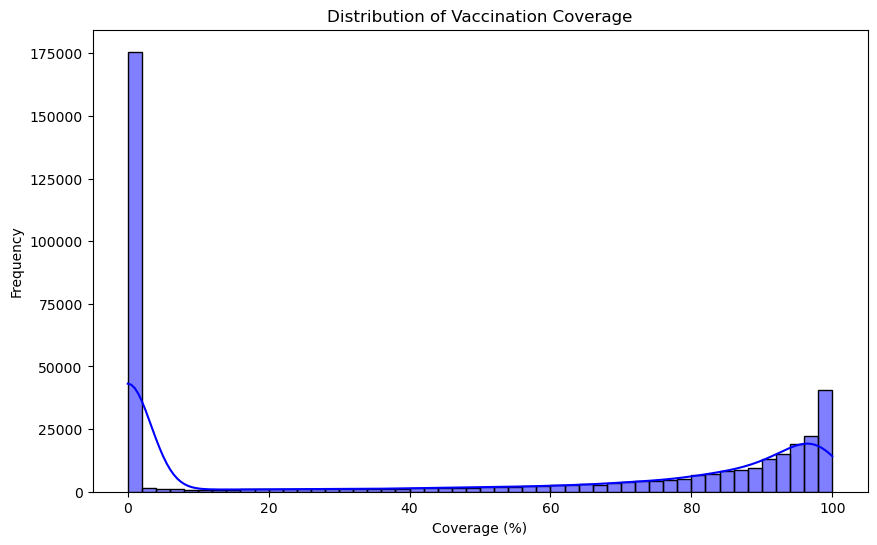

In [154]:
# 1. Distribution of COVERAGE
plt.figure(figsize=(10, 6))
sns.histplot(coverage_data['COVERAGE'], bins=50, kde=True, color='blue')
plt.title('Distribution of Vaccination Coverage')
plt.xlabel('Coverage (%)')
plt.ylabel('Frequency')
plt.show()

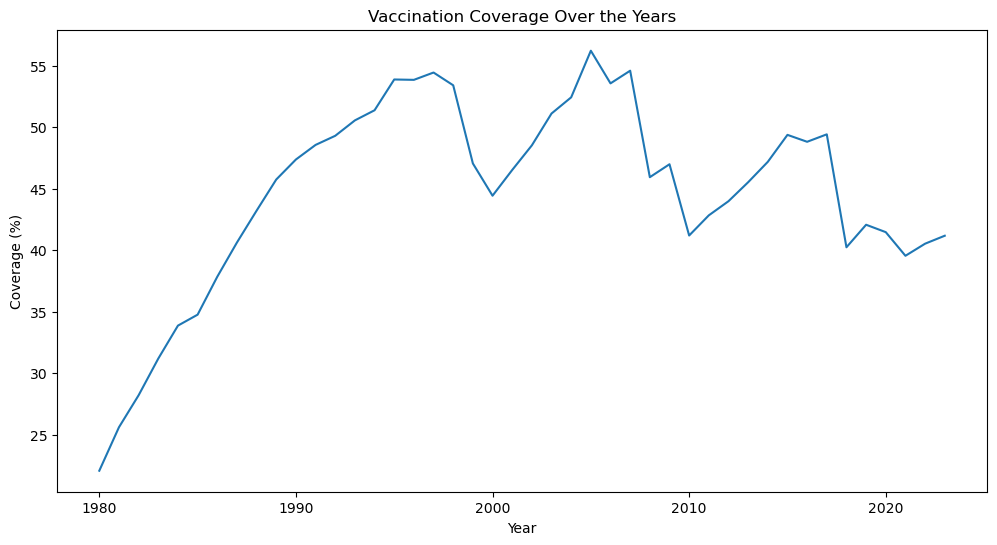

In [160]:
# 2. Coverage over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=coverage_data, x='YEAR', y='COVERAGE', errorbar=None)
plt.title('Vaccination Coverage Over the Years')
plt.xlabel('Year')
plt.ylabel('Coverage (%)')
plt.show()

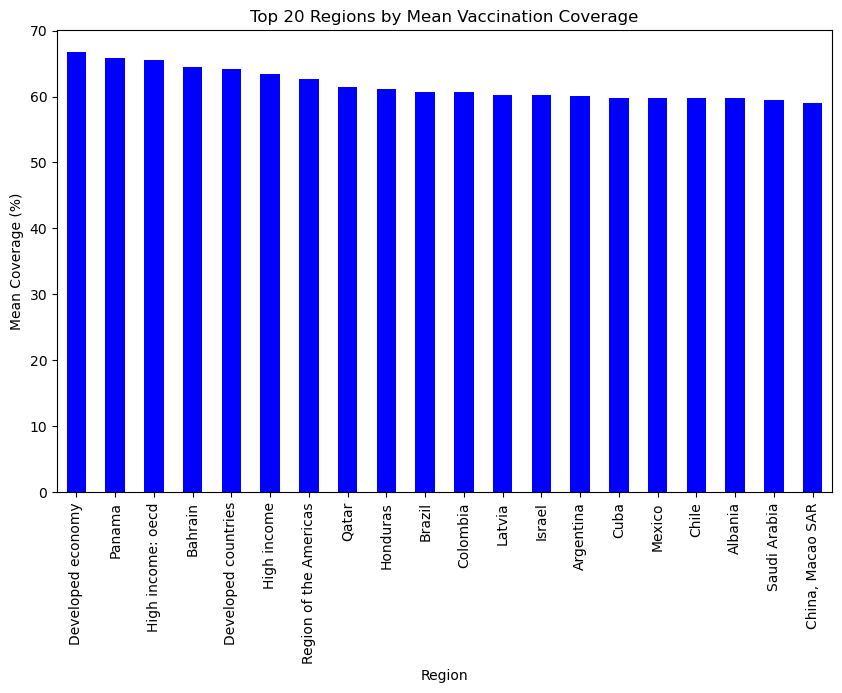

In [178]:
# 3. Regional disparities (Top 20 countries by mean coverage)
regional_coverage = (
    coverage_data.groupby('NAME')['COVERAGE']
    .mean()
    .sort_values(ascending=False)
    .head(20)
)
plt.figure(figsize=(10, 6))
regional_coverage.plot(kind='bar', color='blue')
plt.title('Top 20 Regions by Mean Vaccination Coverage')
plt.xlabel('Region')
plt.ylabel('Mean Coverage (%)')
plt.show()

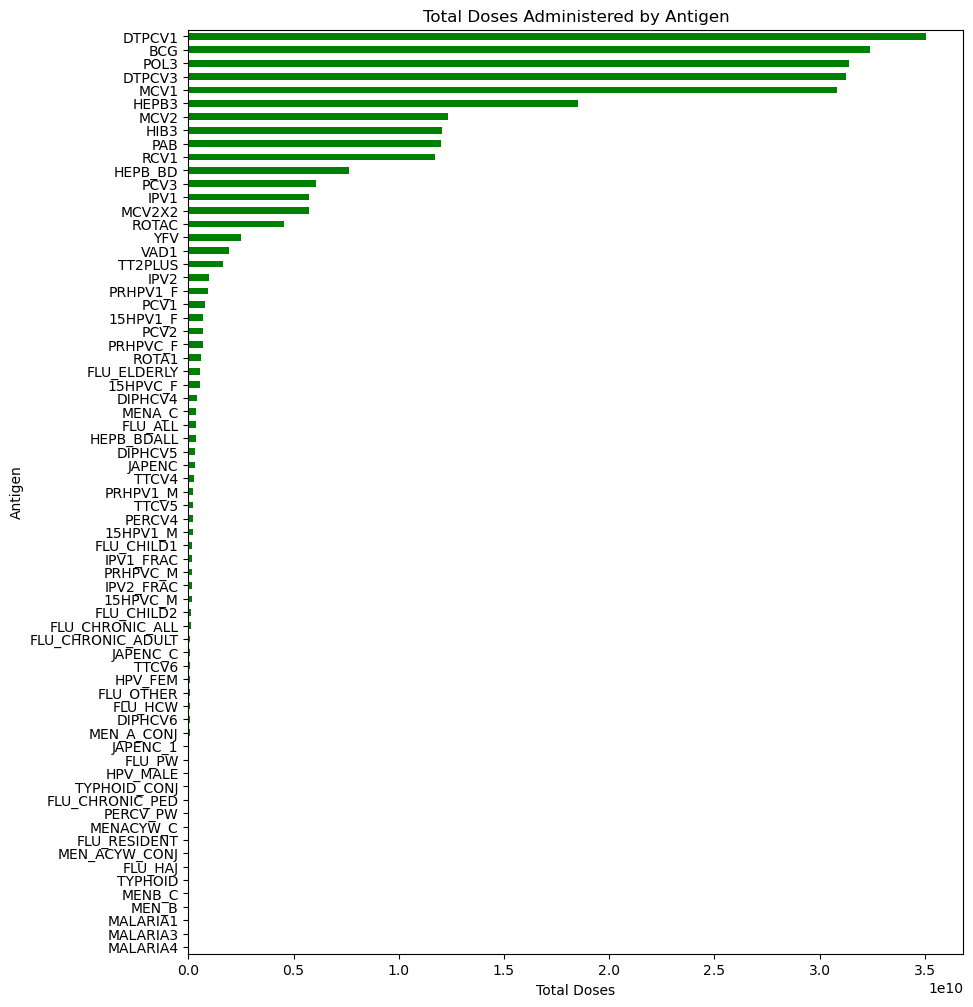

In [202]:
# Calculate total doses by ANTIGEN
total_doses_by_antigen = coverage_data.groupby('ANTIGEN')['DOSES'].sum().sort_values()

# Plot the total doses by ANTIGEN
plt.figure(figsize=(10, 12))
total_doses_by_antigen.plot(kind='barh', color='green')
plt.title('Total Doses Administered by Antigen')
plt.xlabel('Total Doses')
plt.ylabel('Antigen')
plt.show()

In [206]:
# Calculating Mean Coverage by Antigen
antigen_coverage = coverage_data.groupby('ANTIGEN')['COVERAGE'].mean().sort_values(ascending=False)
antigen_coverage

ANTIGEN
DTPCV1      80.770993
POL3        76.529145
DTPCV3      76.259640
MCV1        73.948343
BCG         72.138151
              ...    
MALARIA3     1.817658
FLU_ALL      1.727901
MALARIA4     1.433228
TYPHOID      0.832298
FLU_HAJ      0.793532
Name: COVERAGE, Length: 69, dtype: float64

In [188]:
top_antigens = antigen_coverage.head(10)

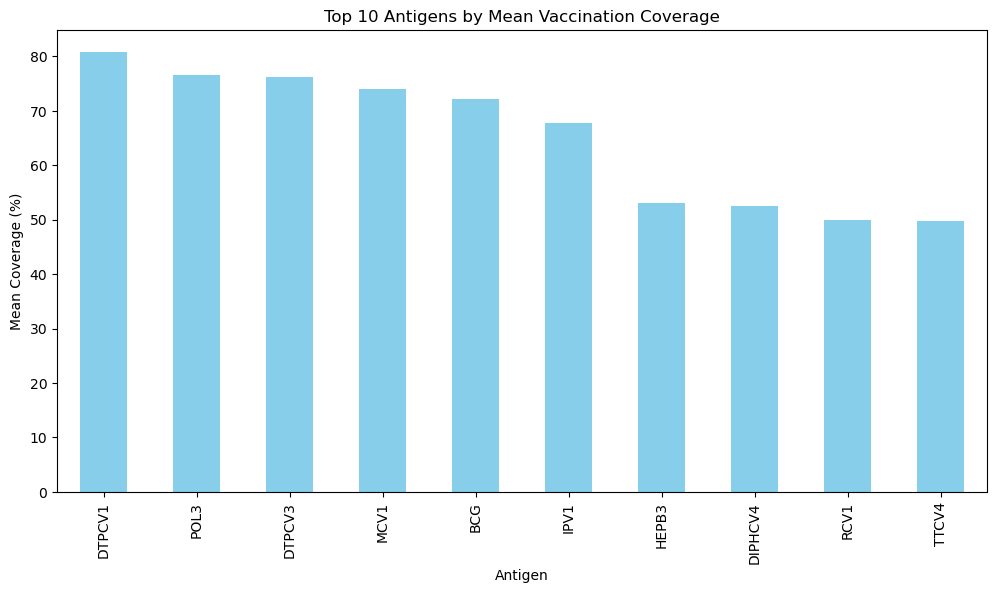

In [208]:
# Mean Coverage by Antigen
plt.figure(figsize=(12, 6))
top_antigens.plot(kind='bar', color='skyblue')
plt.title('Top 10 Antigens by Mean Vaccination Coverage')
plt.xlabel('Antigen')
plt.ylabel('Mean Coverage (%)')
plt.show()

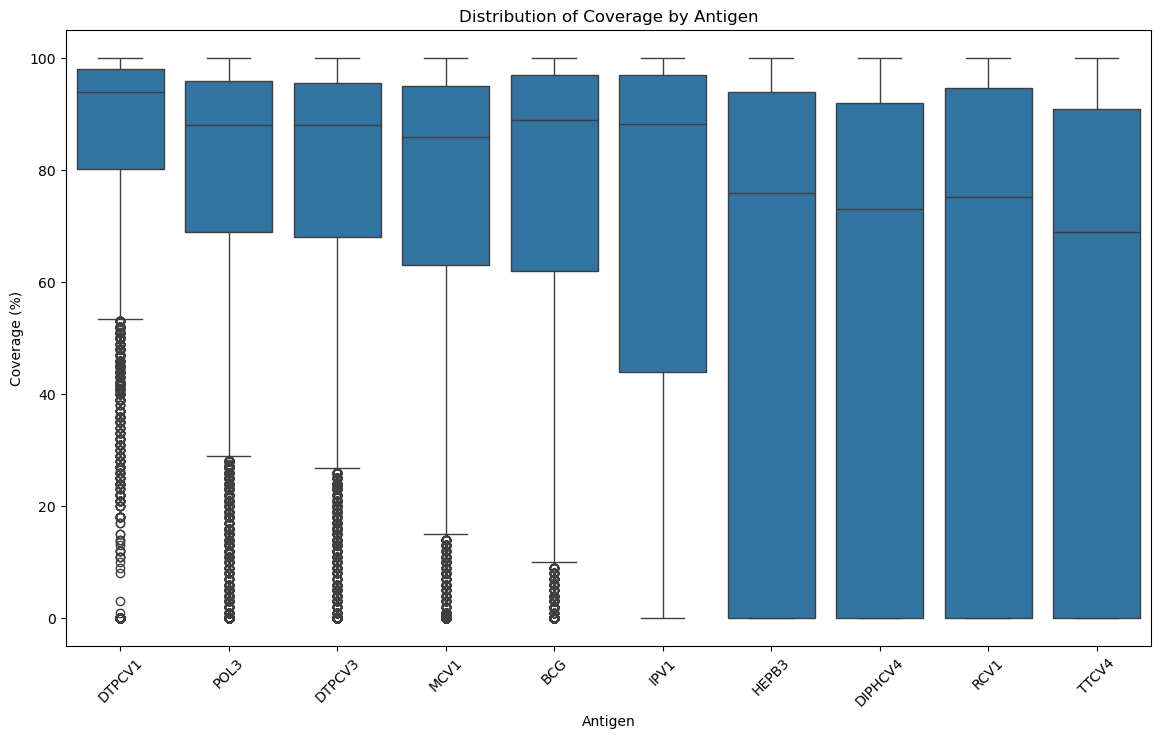

In [194]:
# Distribution of Coverage by Antigen
plt.figure(figsize=(14, 8))
sns.boxplot(data=coverage_data, x='ANTIGEN', y='COVERAGE', order=top_antigens.index)
plt.xticks(rotation=45)
plt.title('Distribution of Coverage by Antigen')
plt.xlabel('Antigen')
plt.ylabel('Coverage (%)')
plt.show()

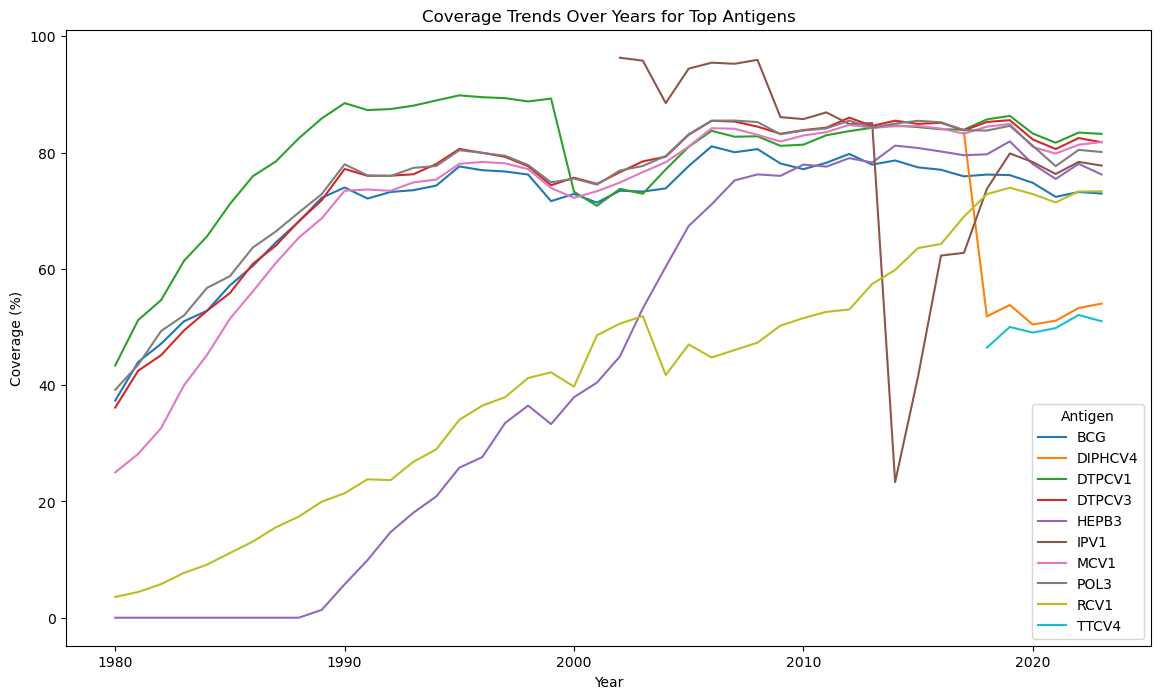

In [198]:
# Coverage Trends Over Years for Top Antigens
top_antigen_list = top_antigens.index.tolist()
trend_data = coverage_data[coverage_data['ANTIGEN'].isin(top_antigen_list)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=trend_data, x='YEAR', y='COVERAGE', hue='ANTIGEN', errorbar=None)
plt.title('Coverage Trends Over Years for Top Antigens')
plt.xlabel('Year')
plt.ylabel('Coverage (%)')
plt.legend(title='Antigen')
plt.show()

In [250]:
# Summary statistics for TARGET_NUMBER and DOSES
summary_stats = coverage_data[['TARGET_NUMBER', 'DOSES']].describe()
summary_stats

,TARGET_NUMBER,DOSES
count,3.998580e+05,3.998580e+05
mean,1.319369e+06,6.878588e+05
std,9.722589e+06,5.200985e+06
min,-2.147484e+09,-2.222882e+08
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,1.464426e+08,1.266052e+08


In [252]:
correlation = coverage_data[['TARGET_NUMBER', 'DOSES']].corr()
correlation

,TARGET_NUMBER,DOSES
TARGET_NUMBER,1.000000,0.732425
DOSES,0.732425,1.000000


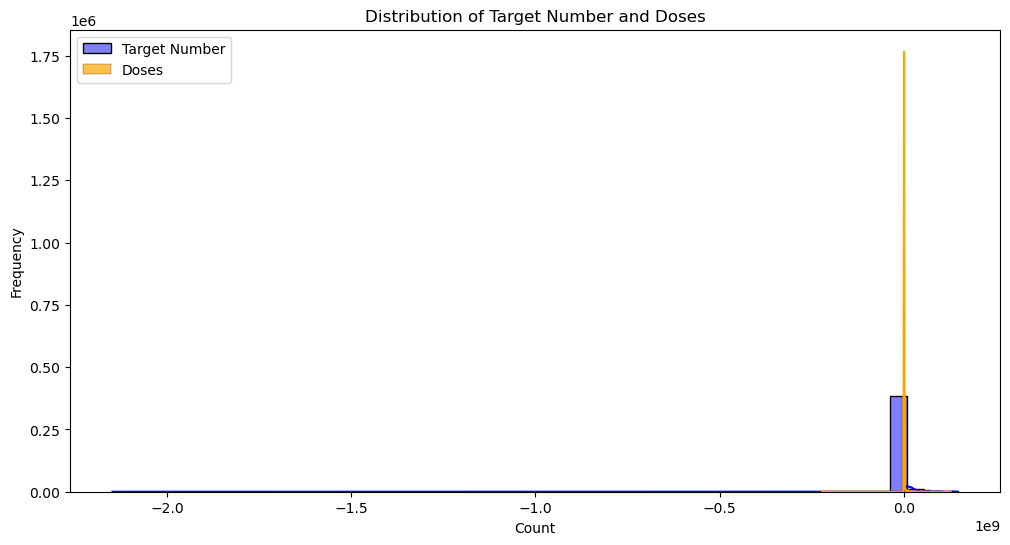

In [264]:
# Distribution of TARGET_NUMBER and DOSES
plt.figure(figsize=(12, 6))
sns.histplot(data=coverage_data, x='TARGET_NUMBER', bins=50, kde=True, color='blue', label='Target Number')
sns.histplot(data=coverage_data, x='DOSES', bins=50, kde=True, color='orange', label='Doses', alpha=0.7)
plt.title('Distribution of Target Number and Doses')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

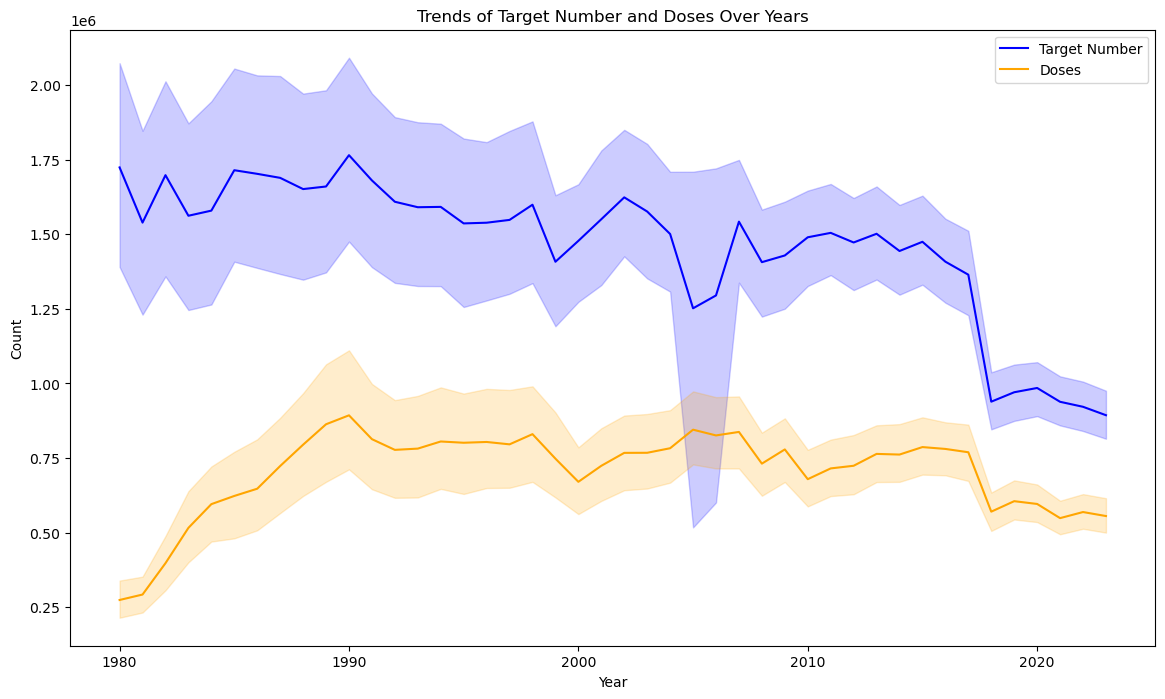

In [258]:
# Trends over years for TARGET_NUMBER and DOSES
plt.figure(figsize=(14, 8))
sns.lineplot(data=coverage_data, x='YEAR', y='TARGET_NUMBER', label='Target Number', color='blue')
sns.lineplot(data=coverage_data, x='YEAR', y='DOSES', label='Doses', color='orange')
plt.title('Trends of Target Number and Doses Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

### data2 - incidence-rate-data

In [266]:
incidence_rate_data

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0
1,COUNTRIES,ABW,Aruba,2023,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0
2,COUNTRIES,ABW,Aruba,2023,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3
3,COUNTRIES,ABW,Aruba,2023,MEASLES,Measles,"per 1,000,000 total population",0.0
4,COUNTRIES,ABW,Aruba,2023,MUMPS,Mumps,"per 1,000,000 total population",0.0
...,...,...,...,...,...,...,...,...
84940,COUNTRIES,ZWE,Zimbabwe,1980,NTETANUS,Neonatal tetanus,"per 1,000 live births",0.4
84941,COUNTRIES,ZWE,Zimbabwe,1980,PERTUSSIS,Pertussis,"per 1,000,000 total population",893.3
84942,COUNTRIES,ZWE,Zimbabwe,1980,POLIO,Poliomyelitis,"per 1,000,000 <15 population",0.0
84943,COUNTRIES,ZWE,Zimbabwe,1980,TTETANUS,Total tetanus,"per 1,000,000 total population",19.7


In [268]:
# incidence rate for each disease
disease_rates = incidence_rate_data.groupby('DISEASE')['INCIDENCE_RATE'].mean().reset_index()

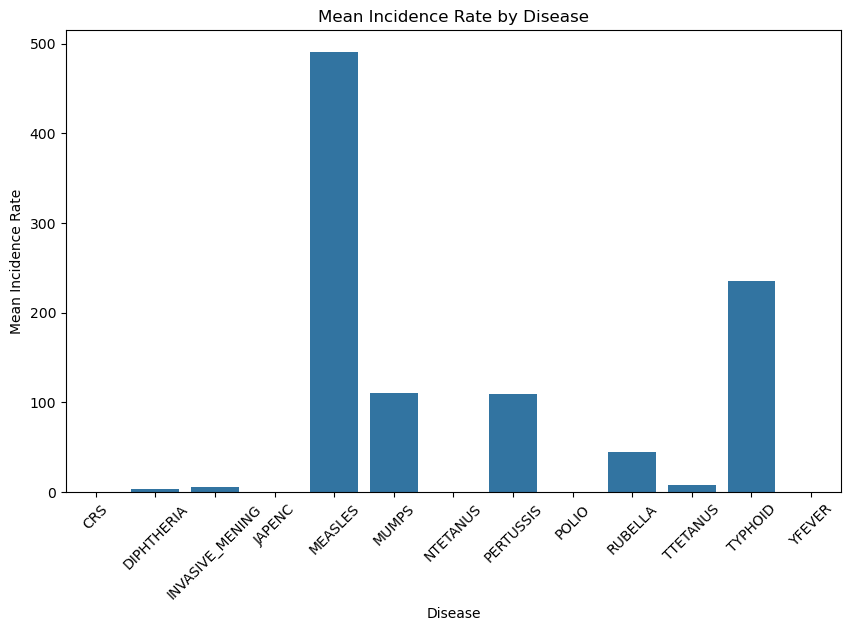

In [274]:
# Disease Burden plotting for mean incidence rate of each disease
plt.figure(figsize=(10, 6))
sns.barplot(x="DISEASE", y="INCIDENCE_RATE", data=disease_rates)
plt.xlabel("Disease")
plt.ylabel("Mean Incidence Rate")
plt.title("Mean Incidence Rate by Disease")
plt.xticks(rotation=45)
plt.show()

In [345]:
# Calculating Mean Incidence Rate for Each Region and Disease
regional_rates = incidence_rate_data.groupby(["NAME", "DISEASE"])["INCIDENCE_RATE"].mean().reset_index()

In [351]:
# region with the highest incidence rate for each disease
top_regions_per_disease = regional_rates.loc[regional_rates.groupby('DISEASE')['INCIDENCE_RATE'].idxmax()]

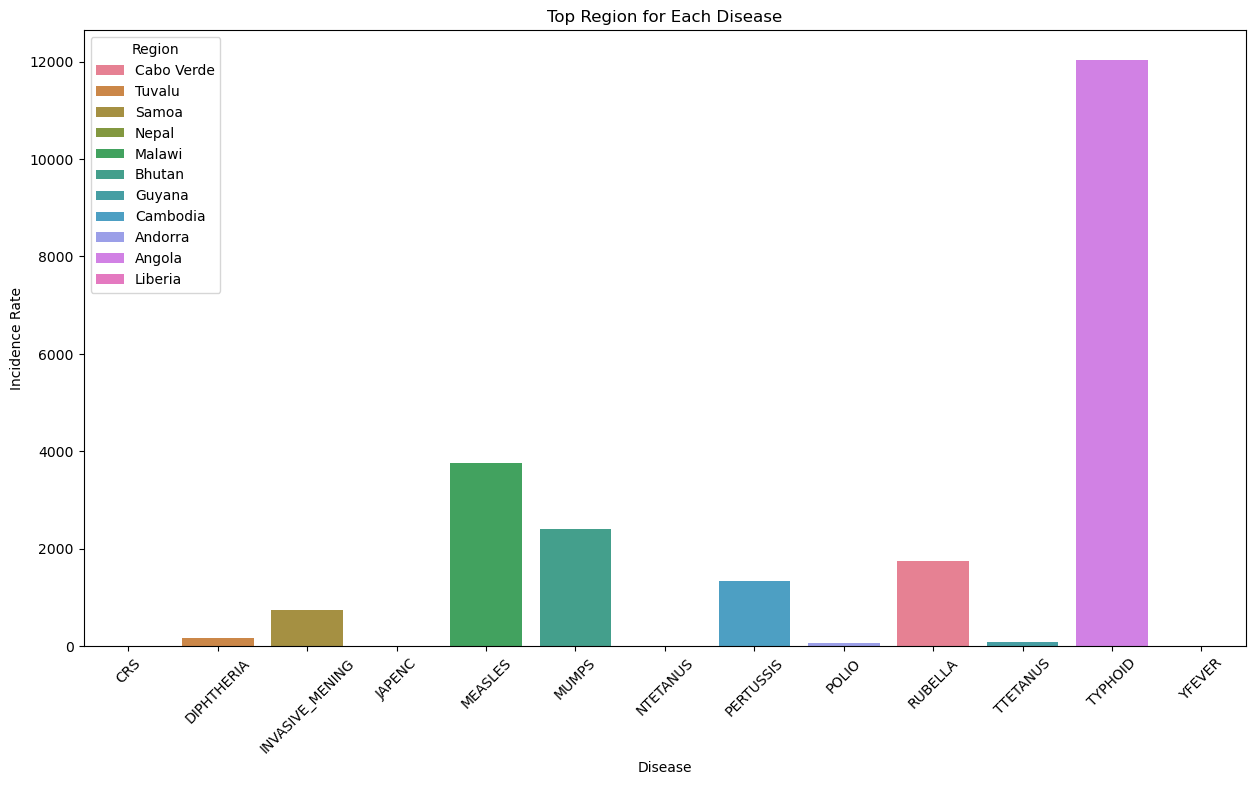

In [353]:
# top regions based on disease and incidence rate 
plt.figure(figsize=(15, 8))
sns.barplot(x="DISEASE", y="INCIDENCE_RATE", hue="NAME", data=top_regions_per_disease)
plt.xlabel("Disease")
plt.ylabel("Incidence Rate")
plt.title("Top Region for Each Disease")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.show()

In [320]:
# Incidence rate over time
time_series_rates = incidence_rate_data.groupby(["DISEASE", "YEAR"])["INCIDENCE_RATE"].mean().reset_index()

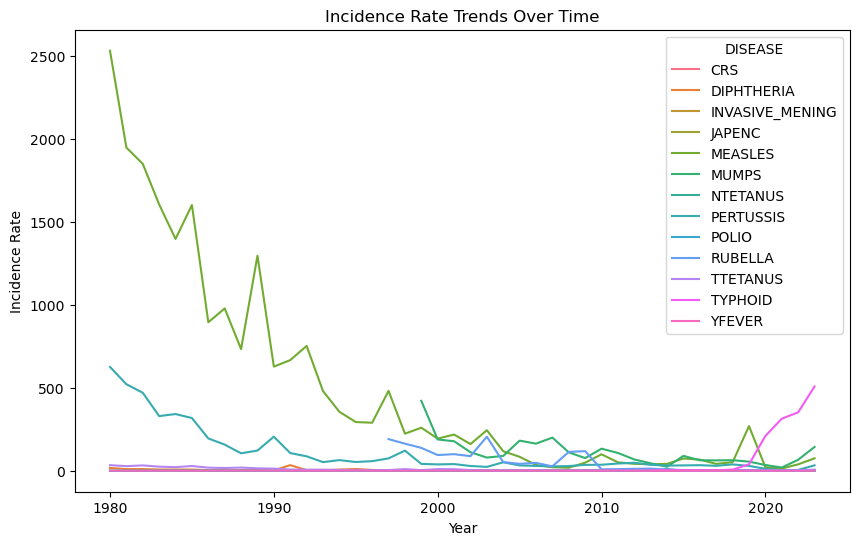

In [322]:
# Trends in incidence rates over time
plt.figure(figsize=(10, 6))
sns.lineplot(x="YEAR", y="INCIDENCE_RATE", hue="DISEASE", data=time_series_rates)
plt.xlabel("Year")
plt.ylabel("Incidence Rate")
plt.title("Incidence Rate Trends Over Time")
plt.show()

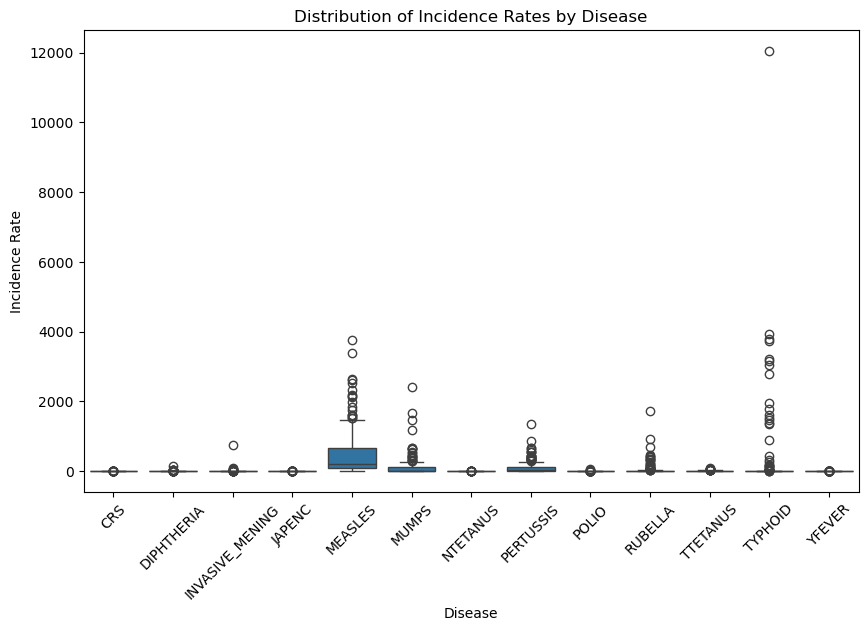

In [359]:
# distribution of incidence rates for each disease
plt.figure(figsize=(10, 6))
sns.boxplot(x="DISEASE", y="INCIDENCE_RATE", data=regional_rates)
plt.xlabel("Disease")
plt.ylabel("Incidence Rate")
plt.title("Distribution of Incidence Rates by Disease")
plt.xticks(rotation=45)
plt.show()

In [373]:
merged_df = pd.merge(incidence_rate_data, coverage_data, 
                     on=['NAME', 'YEAR', 'CODE'], how='inner')

In [375]:
merged_df

,GROUP_x,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE,GROUP_y,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0,COUNTRIES,BCG,BCG,ADMIN,Administrative coverage,0,0,0.00
1,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0,COUNTRIES,BCG,BCG,OFFICIAL,Official coverage,0,0,0.00
2,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0,COUNTRIES,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044,945,90.52
3,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0,COUNTRIES,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,0,0,90.52
4,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0,COUNTRIES,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219,1008,82.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013718,COUNTRIES,ZWE,Zimbabwe,1980,YFEVER,Yellow fever,"per 1,000,000 total population",0.0,COUNTRIES,MCV2,"Measles-containing vaccine, 2nd dose",ADMIN,Administrative coverage,0,0,0.00
4013719,COUNTRIES,ZWE,Zimbabwe,1980,YFEVER,Yellow fever,"per 1,000,000 total population",0.0,COUNTRIES,PAB,Protection at birth (PAB) against neonatal tet...,PAB,PAB Estimates,0,0,0.00
4013720,COUNTRIES,ZWE,Zimbabwe,1980,YFEVER,Yellow fever,"per 1,000,000 total population",0.0,COUNTRIES,POL3,"Polio, 3rd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,0,0,0.00
4013721,COUNTRIES,ZWE,Zimbabwe,1980,YFEVER,Yellow fever,"per 1,000,000 total population",0.0,COUNTRIES,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,0,0,0.00


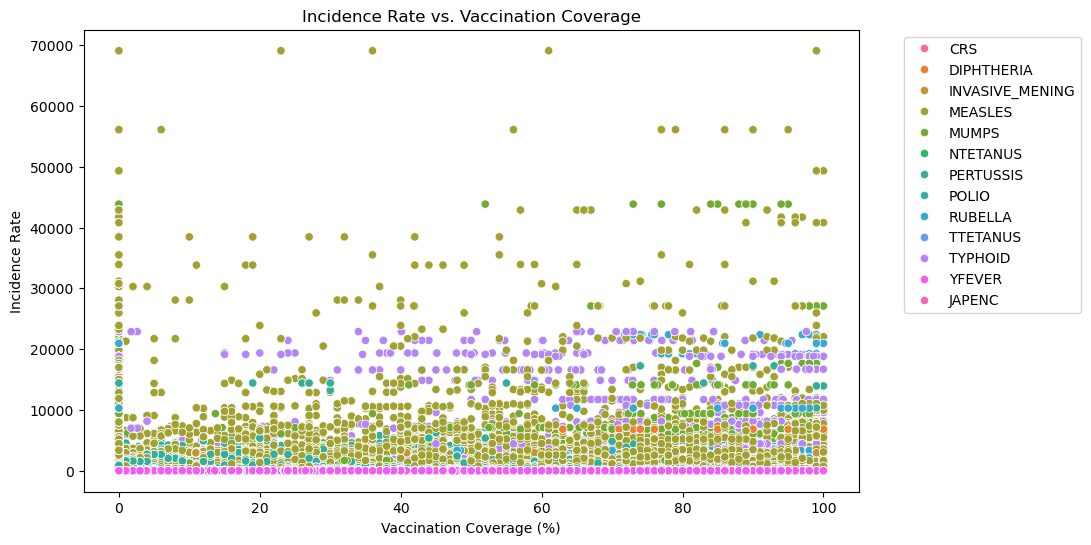

In [378]:
# The relationship between incidence rates and vaccination coverage for each disease.
plt.figure(figsize=(10, 6))
sns.scatterplot(x="COVERAGE", y="INCIDENCE_RATE", hue="DISEASE", data=merged_df)
plt.xlabel("Vaccination Coverage (%)")
plt.ylabel("Incidence Rate")
plt.title("Incidence Rate vs. Vaccination Coverage")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### data3 - reported_cases_data

In [419]:
reported_cases_data

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,CASES
0,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,0
1,COUNTRIES,ABW,Aruba,2023,DIPHTHERIA,Diphtheria,0
2,COUNTRIES,ABW,Aruba,2023,INVASIVE_MENING,Invasive meningococcal disease,1
3,COUNTRIES,ABW,Aruba,2023,MEASLES,Measles,0
4,COUNTRIES,ABW,Aruba,2023,MUMPS,Mumps,0
...,...,...,...,...,...,...,...
84864,COUNTRIES,ZWE,Zimbabwe,1980,NTETANUS,Neonatal tetanus,134
84865,COUNTRIES,ZWE,Zimbabwe,1980,PERTUSSIS,Pertussis,6290
84866,COUNTRIES,ZWE,Zimbabwe,1980,POLIO,Poliomyelitis,32
84867,COUNTRIES,ZWE,Zimbabwe,1980,TTETANUS,Total tetanus,139


In [435]:
# Calculating the Number of Reported Cases for Each Disease Over Time
cases_over_time = reported_cases_data.groupby(['YEAR', 'DISEASE'])['CASES'].sum().reset_index()

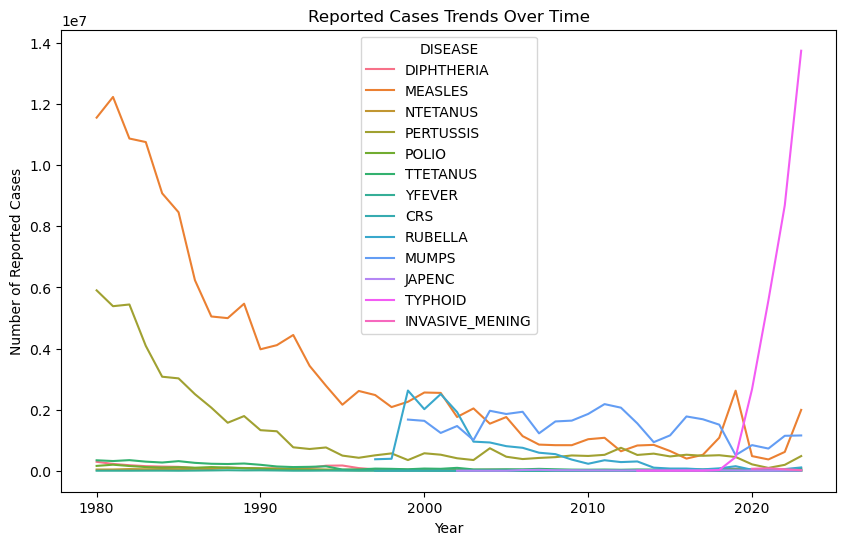

In [437]:
# Disease Incidence Trends:
plt.figure(figsize=(10, 6))
sns.lineplot(x="YEAR", y="CASES", hue="DISEASE", data=cases_over_time)
plt.xlabel("Year")
plt.ylabel("Number of Reported Cases")
plt.title("Reported Cases Trends Over Time")
plt.show()

In [441]:
# Calculate the number of cases for each disease
disease_counts = reported_cases_data.groupby("DISEASE")["CASES"].sum()

print(disease_counts)

DISEASE
CRS                    28650
DIPHTHERIA           2908251
INVASIVE_MENING       207198
JAPENC                225494
MEASLES            144065673
MUMPS               36326936
NTETANUS             1503802
PERTUSSIS           53089864
POLIO                1623271
RUBELLA             16655663
TTETANUS             4888011
TYPHOID             31153098
YFEVER                132678
Name: CASES, dtype: int32


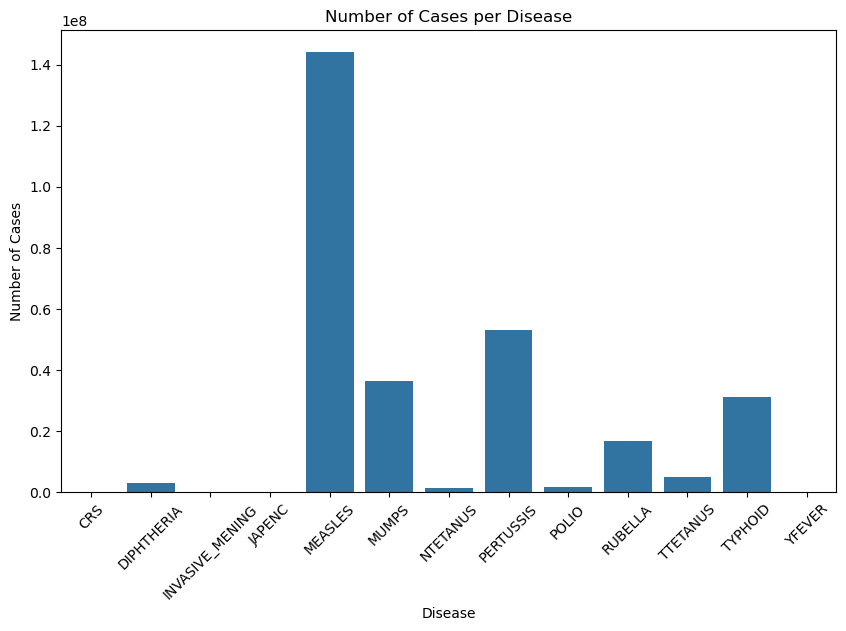

In [483]:
plt.figure(figsize=(10, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values) 
plt.xlabel("Disease")
plt.ylabel("Number of Cases")
plt.title("Number of Cases per Disease")
plt.xticks(rotation=45)
plt.show()

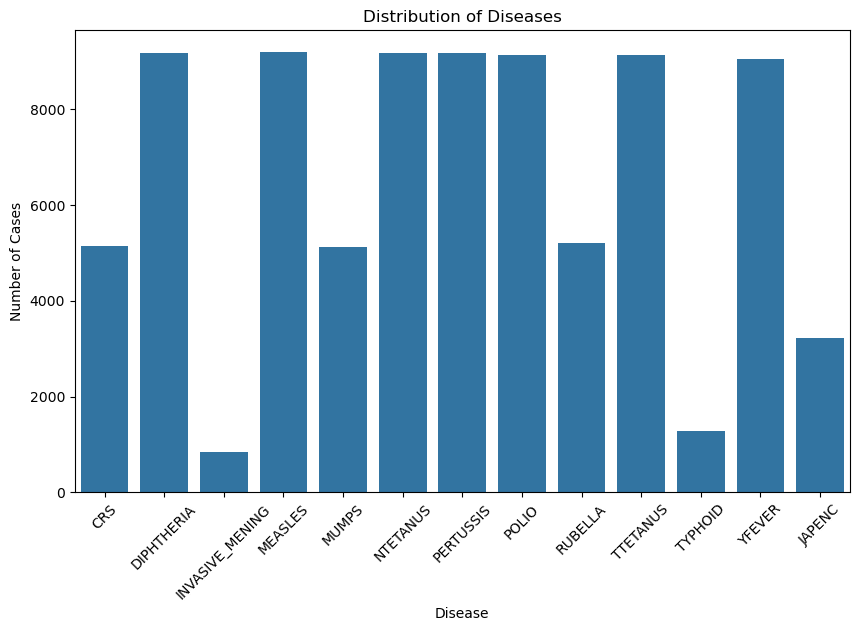

In [479]:
# Disease Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="DISEASE", data=reported_cases_data)
plt.xlabel("Disease")
plt.ylabel("Number of Cases")
plt.title("Distribution of Diseases")
plt.xticks(rotation=45)
plt.show()

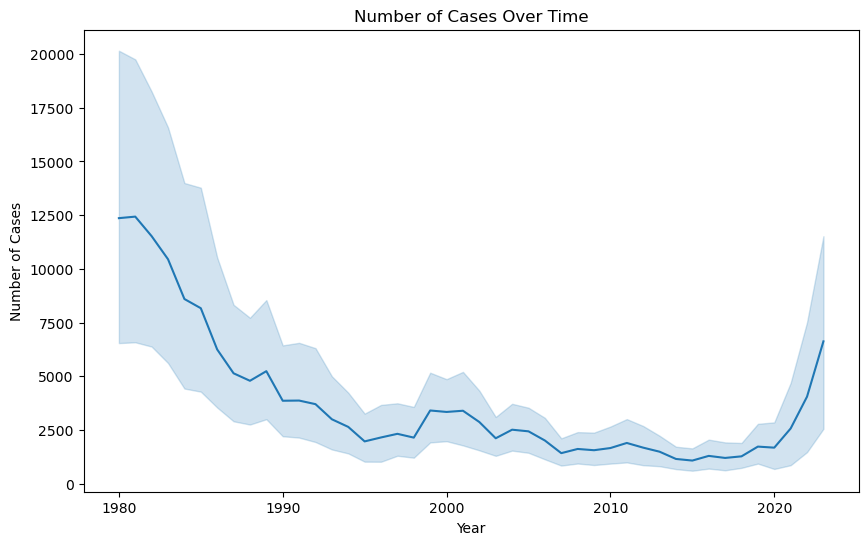

In [447]:
# Cases Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x="YEAR", y="CASES", data=reported_cases_data)
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Number of Cases Over Time")
plt.show()

In [465]:
# Top 10 regions with the highest number of cases
top_regions = reported_cases_data.groupby('NAME')['CASES'].sum().sort_values(ascending=False).head(10).index
filtered_reported_cases_data = reported_cases_data[reported_cases_data['NAME'].isin(top_regions)]

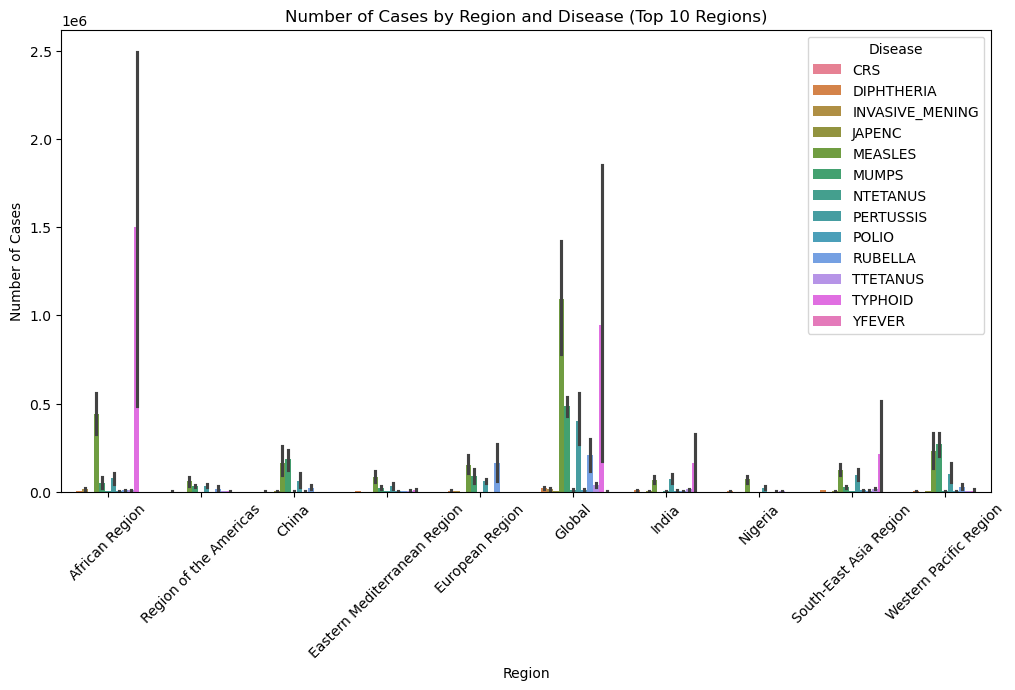

In [467]:
plt.figure(figsize=(12, 6))
sns.barplot(x="NAME", y="CASES", hue="DISEASE", data=filtered_reported_cases_data)
plt.xlabel("Region")
plt.ylabel("Number of Cases")
plt.title("Number of Cases by Region and Disease (Top 10 Regions)")
plt.xticks(rotation=45)
plt.legend(title="Disease")
plt.show()

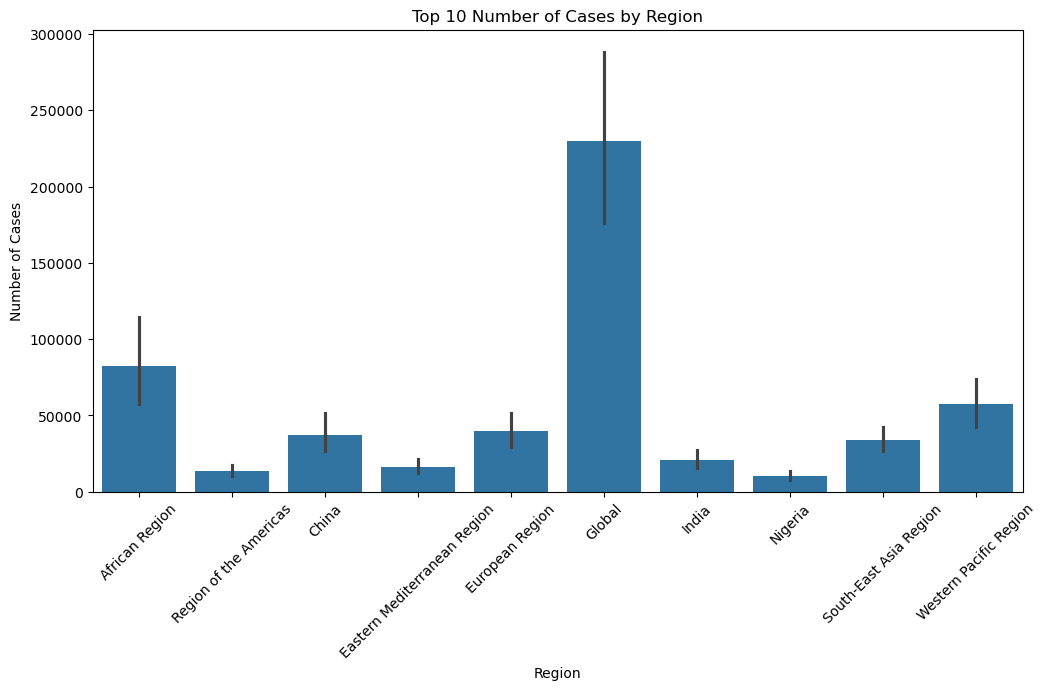

In [473]:
# Top 10 Regional Distribution of Cases
plt.figure(figsize=(12, 6))
sns.barplot(x="NAME", y="CASES", data=filtered_reported_cases_data)
plt.xlabel("Region")
plt.ylabel("Number of Cases")
plt.title("Top 10 Number of Cases by Region")
plt.xticks(rotation=45)
plt.show()

In [485]:
# Merge Dataset (assuming 'NAME', 'YEAR', and 'CODE' are common identifiers)
merged_df1 = pd.merge(reported_cases_data, incidence_rate_data, on=['NAME', 'YEAR', 'DISEASE'], how='inner')
merged_df1 = pd.merge(merged_df1, coverage_data, on=['NAME', 'YEAR'], how='inner')

In [487]:
merged_df1

,GROUP_x,CODE_x,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION_x,CASES,GROUP_y,CODE_y,DISEASE_DESCRIPTION_y,...,INCIDENCE_RATE,GROUP,CODE,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,0,COUNTRIES,ABW,Congenital rubella syndrome,...,0.0,COUNTRIES,ABW,BCG,BCG,ADMIN,Administrative coverage,0,0,0.00
1,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,0,COUNTRIES,ABW,Congenital rubella syndrome,...,0.0,COUNTRIES,ABW,BCG,BCG,OFFICIAL,Official coverage,0,0,0.00
2,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,0,COUNTRIES,ABW,Congenital rubella syndrome,...,0.0,COUNTRIES,ABW,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044,945,90.52
3,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,0,COUNTRIES,ABW,Congenital rubella syndrome,...,0.0,COUNTRIES,ABW,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,0,0,90.52
4,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,0,COUNTRIES,ABW,Congenital rubella syndrome,...,0.0,COUNTRIES,ABW,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219,1008,82.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013022,COUNTRIES,ZWE,Zimbabwe,1980,YFEVER,Yellow fever,0,COUNTRIES,ZWE,Yellow fever,...,0.0,COUNTRIES,ZWE,MCV2,"Measles-containing vaccine, 2nd dose",ADMIN,Administrative coverage,0,0,0.00
4013023,COUNTRIES,ZWE,Zimbabwe,1980,YFEVER,Yellow fever,0,COUNTRIES,ZWE,Yellow fever,...,0.0,COUNTRIES,ZWE,PAB,Protection at birth (PAB) against neonatal tet...,PAB,PAB Estimates,0,0,0.00
4013024,COUNTRIES,ZWE,Zimbabwe,1980,YFEVER,Yellow fever,0,COUNTRIES,ZWE,Yellow fever,...,0.0,COUNTRIES,ZWE,POL3,"Polio, 3rd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,0,0,0.00
4013025,COUNTRIES,ZWE,Zimbabwe,1980,YFEVER,Yellow fever,0,COUNTRIES,ZWE,Yellow fever,...,0.0,COUNTRIES,ZWE,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,0,0,0.00


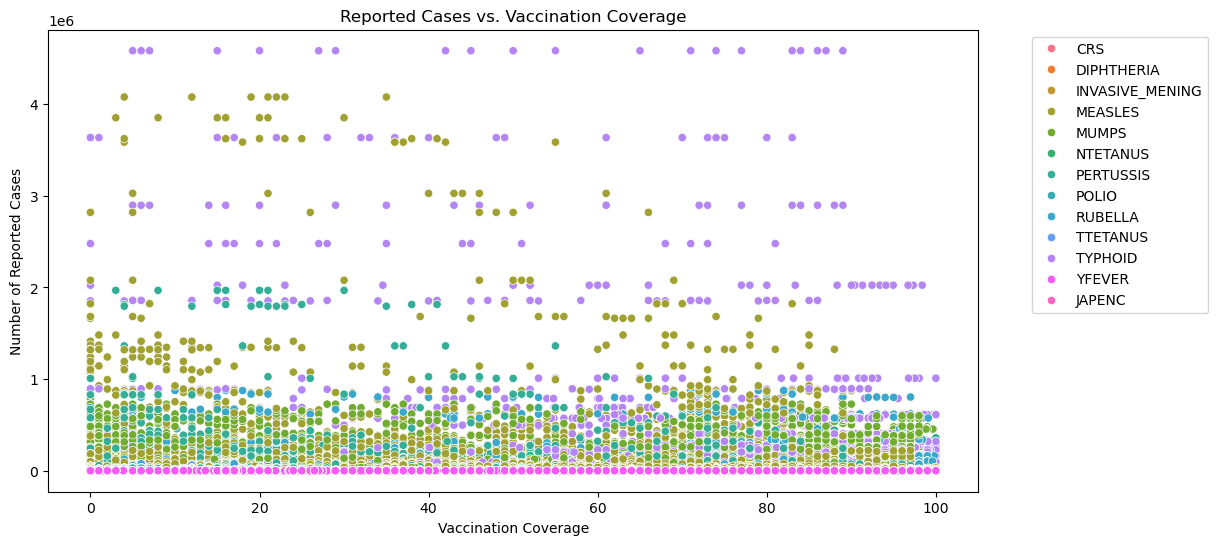

In [494]:
# Vaccination Coverage vs Reported Cases
plt.figure(figsize=(12, 6))
sns.scatterplot(x='COVERAGE', y='CASES', hue='DISEASE', data=merged_df1)
plt.xlabel('Vaccination Coverage')
plt.ylabel('Number of Reported Cases')
plt.title('Reported Cases vs. Vaccination Coverage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

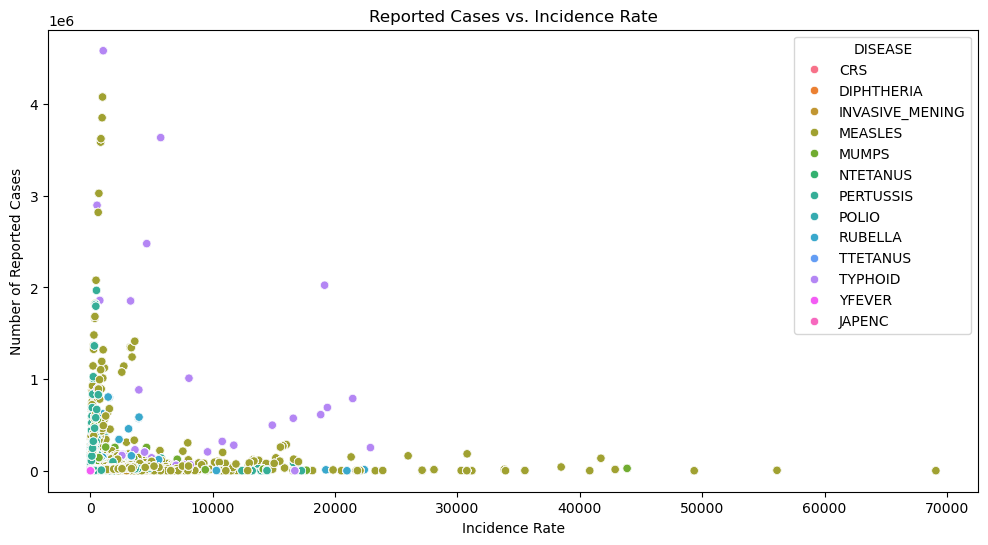

In [496]:
# Reported Cases vs. Incidence Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(x='INCIDENCE_RATE', y='CASES', hue='DISEASE', data=merged_df1)
plt.xlabel('Incidence Rate')
plt.ylabel('Number of Reported Cases')
plt.title('Reported Cases vs. Incidence Rate')
plt.show()

### data4 - vaccine_introduction_data

In [519]:
vaccine_introduction_data

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,DESCRIPTION,INTRO
0,AFG,Afghanistan,EMRO,2023,aP (acellular pertussis) vaccine,No
1,AFG,Afghanistan,EMRO,2023,Hepatitis A vaccine,No
2,AFG,Afghanistan,EMRO,2023,Hepatitis B vaccine,Yes
3,AFG,Afghanistan,EMRO,2023,HepB birth dose,Yes
4,AFG,Afghanistan,EMRO,2023,Hib (Haemophilus influenzae type B) vaccine,Yes
...,...,...,...,...,...,...
138315,ZWE,Zimbabwe,AFRO,1944,Seasonal Influenza vaccine,No
138316,ZWE,Zimbabwe,AFRO,1943,Seasonal Influenza vaccine,No
138317,ZWE,Zimbabwe,AFRO,1942,Seasonal Influenza vaccine,No
138318,ZWE,Zimbabwe,AFRO,1941,Seasonal Influenza vaccine,No


In [573]:
# Count occurrences of each INTRO value
intro_counts = vaccine_introduction_data['INTRO'].value_counts()
intro_counts

INTRO
No                97695
Yes               37844
Yes (R)            1708
Yes (P)             825
High risk area      118
Yes (A)              67
ND                   39
Yes (O)              22
Yes (D)               2
Name: count, dtype: int64

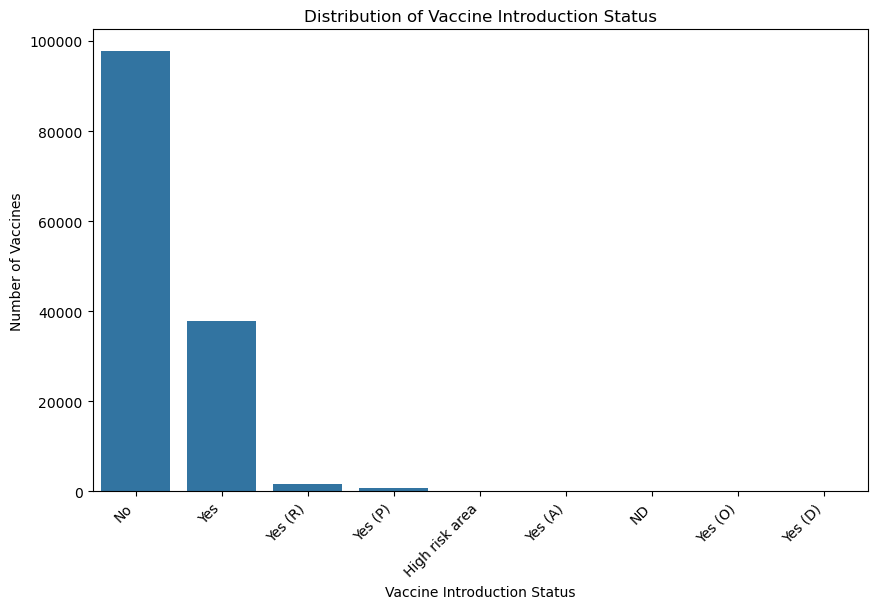

In [575]:
plt.figure(figsize=(10, 6))
sns.barplot(x=intro_counts.index, y=intro_counts.values)
plt.xlabel("Vaccine Introduction Status")
plt.ylabel("Number of Vaccines")
plt.title("Distribution of Vaccine Introduction Status")
plt.xticks(rotation=45, ha='right')
plt.show()

In [607]:
intro_statuses = ['Yes', 'Yes (P)', 'Yes (R)', 'Yes (A)', 'Yes (O)', 'Yes (S)', 'Yes (OPV)', 'High risk','No', 'No (D)', 'ND', 'NR']

In [611]:
introduced_vaccines = vaccine_introduction_data[vaccine_introduction_data['INTRO'].isin(intro_statuses)]

In [617]:
# Group by YEAR and INTRO and count occurrences
yearly_intro_counts = introduced_vaccines.groupby(['YEAR', 'INTRO']).size().reset_index(name='Count')
yearly_intro_counts

,YEAR,INTRO,Count
0,1940,No,163
1,1940,Yes,1
2,1941,No,163
3,1941,Yes,1
4,1942,No,163
...,...,...,...
289,2023,Yes,2158
290,2023,Yes (A),1
291,2023,Yes (O),2
292,2023,Yes (P),21


In [619]:
# Pivot table to reshape data
yearly_intro_pivot = yearly_intro_counts.pivot(index='YEAR', columns='INTRO', values='Count').fillna(0)
yearly_intro_pivot

INTRO,ND,No,Yes,Yes (A),Yes (O),Yes (P),Yes (R)
YEAR,,,,,,,
1940,0.0,163.0,1.0,0.0,0.0,0.0,0.0
1941,0.0,163.0,1.0,0.0,0.0,0.0,0.0
1942,0.0,163.0,1.0,0.0,0.0,0.0,0.0
1943,0.0,163.0,1.0,0.0,0.0,0.0,0.0
1944,0.0,163.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2019,0.0,1958.0,1978.0,1.0,2.0,29.0,103.0
2020,0.0,1928.0,2012.0,1.0,2.0,27.0,101.0
2021,0.0,1876.0,2057.0,1.0,2.0,27.0,108.0


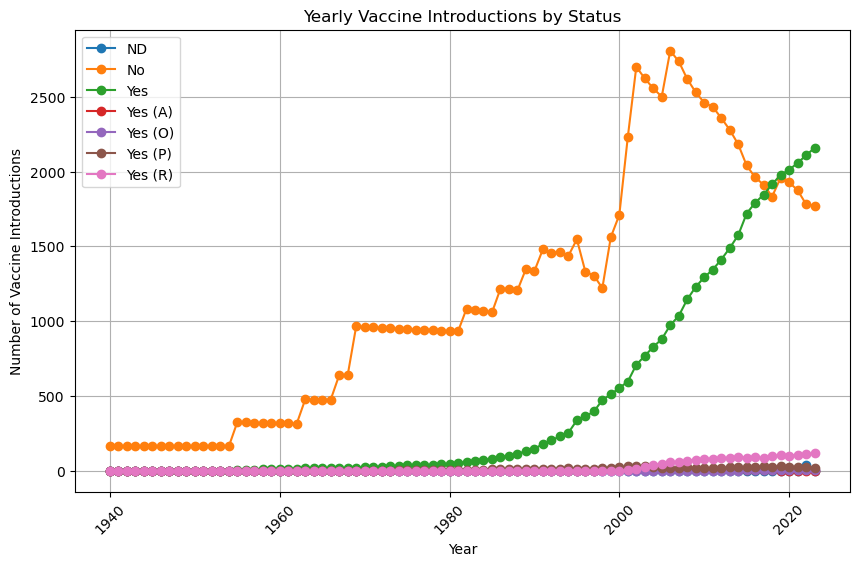

In [621]:
# Each introduction status
plt.figure(figsize=(10, 6))
for col in yearly_intro_pivot.columns:
    plt.plot(yearly_intro_pivot.index, yearly_intro_pivot[col], label=col, marker='o')

plt.xlabel("Year")
plt.ylabel("Number of Vaccine Introductions")
plt.title("Yearly Vaccine Introductions by Status")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [623]:
# Calculate cumulative sum of new vaccine introductions
yearly_introductions_cumulative = yearly_introductions.cumsum()

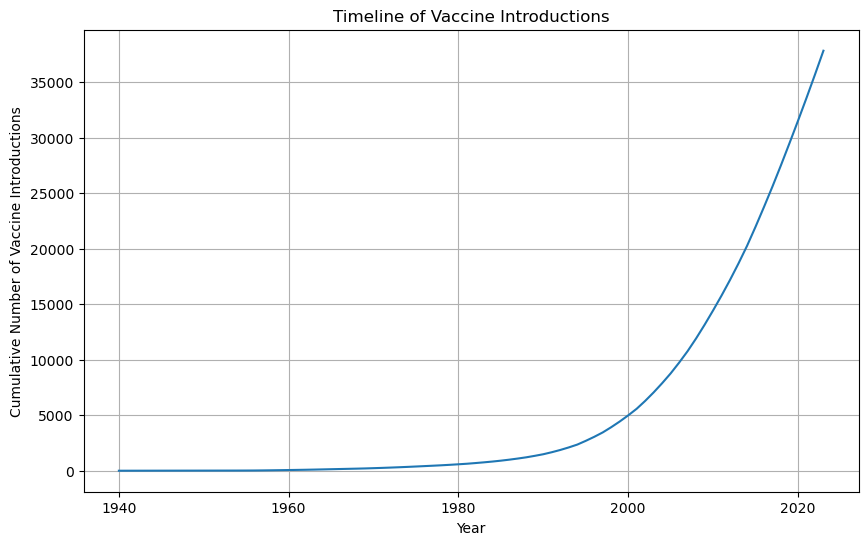

In [625]:
# The timeline of vaccine introduction
plt.figure(figsize=(10, 6))
plt.plot(yearly_introductions_cumulative.index, yearly_introductions_cumulative.values)
plt.xlabel("Year")
plt.ylabel("Cumulative Number of Vaccine Introductions")
plt.title("Timeline of Vaccine Introductions")
plt.grid(True)
plt.show()

### data5 - vaccine-schedule-data

In [652]:
vaccine_schedule_data

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,VACCINECODE,VACCINE_DESCRIPTION,SCHEDULEROUNDS,TARGETPOP,TARGETPOP_DESCRIPTION,GEOAREA,AGEADMINISTERED,SOURCECOMMENT
0,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,1,GENERAL/ROUTINE,General/routine,NATIONAL,M2,No comment available
1,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,2,GENERAL/ROUTINE,General/routine,NATIONAL,M4,No comment available
2,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,3,GENERAL/ROUTINE,General/routine,NATIONAL,M6,No comment available
3,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,4,B_2YL_W,General/routine,NATIONAL,M15,No comment available
4,ABW,Aruba,AMRO,2023,DTAPIPV,DTaP-IPV (acellular) vaccine,5,B_CHILD_W,General/routine,NATIONAL,Y4,No comment available
...,...,...,...,...,...,...,...,...,...,...,...,...
8047,ZWE,Zimbabwe,AFRO,2023,VITAMINA,Vitamin A supplements,2,GENERAL/ROUTINE,General/routine,NATIONAL,M12,M6-M59
8048,ZWE,Zimbabwe,AFRO,2023,VITAMINA,Vitamin A supplements,3,GENERAL/ROUTINE,General/routine,NATIONAL,M18,M6-M59
8049,ZWE,Zimbabwe,AFRO,2023,VITAMINA,Vitamin A supplements,4,GENERAL/ROUTINE,General/routine,NATIONAL,M24,M6-M59
8050,ZWE,Zimbabwe,AFRO,2023,VITAMINA,Vitamin A supplements,5,GENERAL/ROUTINE,General/routine,NATIONAL,M30,M6-M59


In [819]:
# Filter for top N most frequent VACCINECODE
N = 10
top_vaccine_codes = vaccine_schedule_data['VACCINECODE'].value_counts().nlargest(N).index
filtered_df = vaccine_schedule_data[vaccine_schedule_data['VACCINECODE'].isin(top_vaccine_codes)]

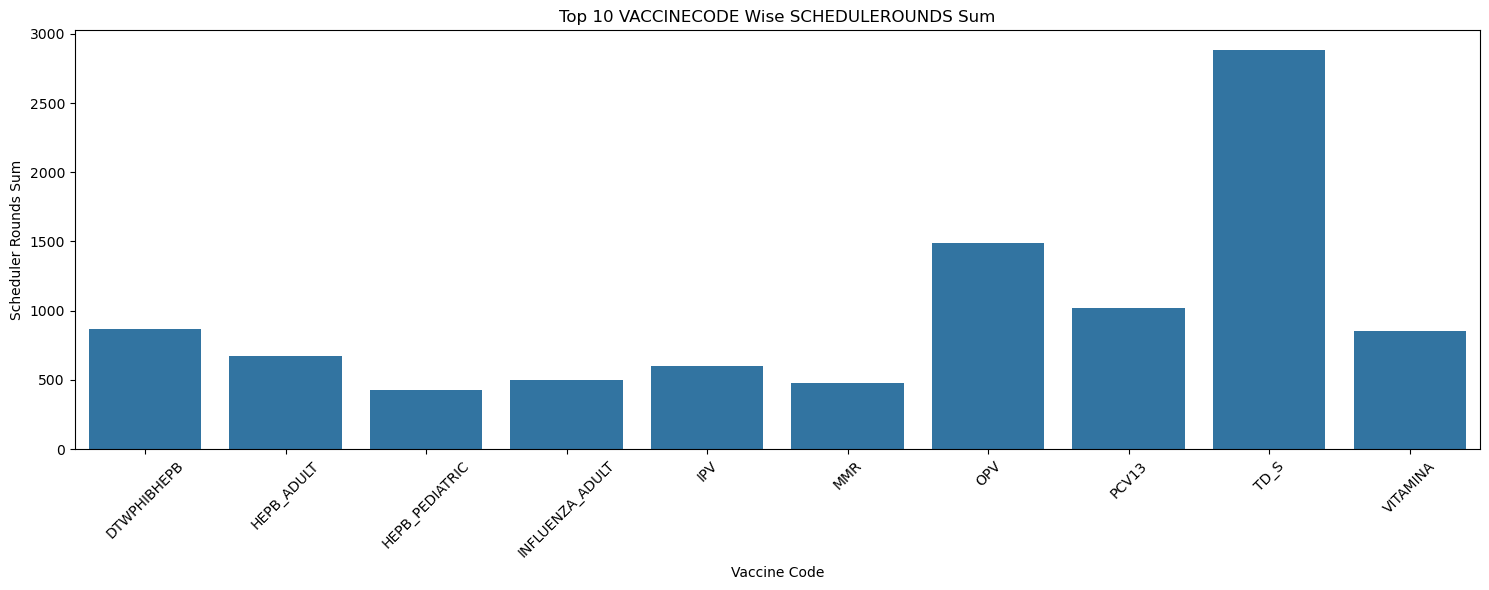

In [823]:
# Top N VACCINECODE wise SCHEDULEROUNDS sum
vaccine_schedulerounds_sum = filtered_df.groupby('VACCINECODE')['SCHEDULEROUNDS'].sum().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(x='VACCINECODE', y='SCHEDULEROUNDS', data=vaccine_schedulerounds_sum)
plt.title(f'Top {N} VACCINECODE Wise SCHEDULEROUNDS Sum')
plt.xlabel('Vaccine Code')
plt.ylabel('Scheduler Rounds Sum')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

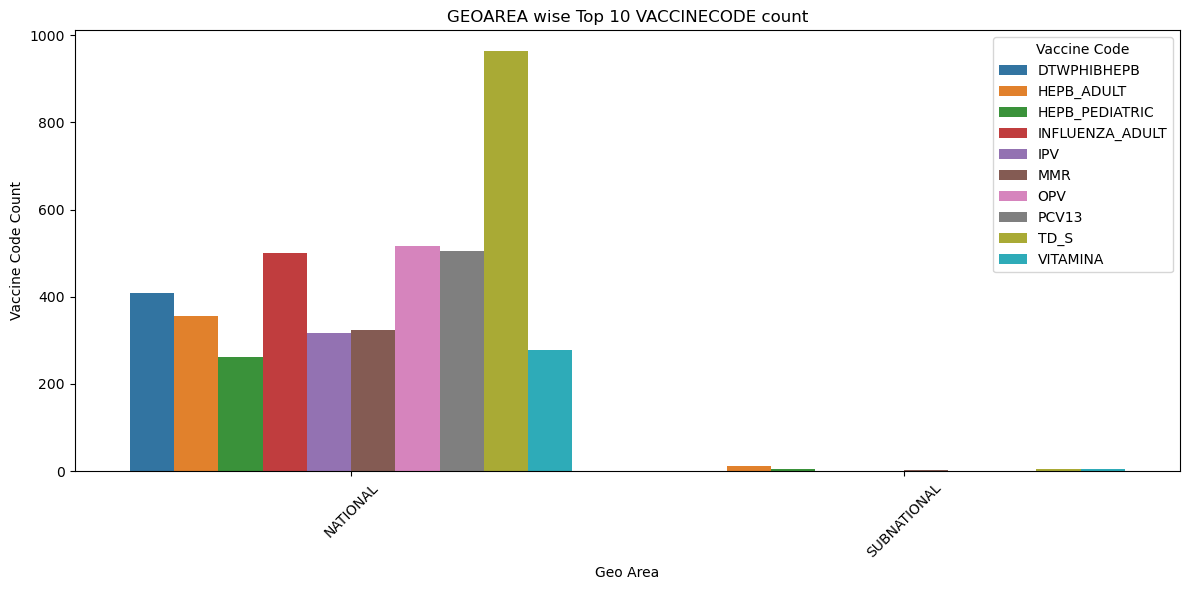

In [825]:
# GEOAREA wise top N VACCINECODE count
geoarea_vaccine_counts = filtered_df.groupby(['GEOAREA', 'VACCINECODE']).size().reset_index(name='counts')
plt.figure(figsize=(12, 6))
sns.barplot(x='GEOAREA', y='counts', hue='VACCINECODE', data=geoarea_vaccine_counts)
plt.title(f'GEOAREA wise Top {N} VACCINECODE count')
plt.xlabel('Geo Area')
plt.ylabel('Vaccine Code Count')
plt.legend(title='Vaccine Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [740]:
# Count the number of vaccines recommended for each age group
age_group_counts = vaccine_schedule_data.groupby(['COUNTRYNAME', 'YEAR', 'AGEADMINISTERED']).size().reset_index(name='VACCINE_COUNT')
age_group_counts

,COUNTRYNAME,YEAR,AGEADMINISTERED,VACCINE_COUNT
0,Afghanistan,2023,+M1,1
1,Afghanistan,2023,+M6,1
2,Afghanistan,2023,+Y1,2
3,Afghanistan,2023,1st contact,1
4,Afghanistan,2023,B,3
...,...,...,...,...
3586,"occupied Palestinian territory, including east...",2023,M4,4
3587,"occupied Palestinian territory, including east...",2023,M6,3
3588,"occupied Palestinian territory, including east...",2023,W1,1
3589,"occupied Palestinian territory, including east...",2023,Y15,1


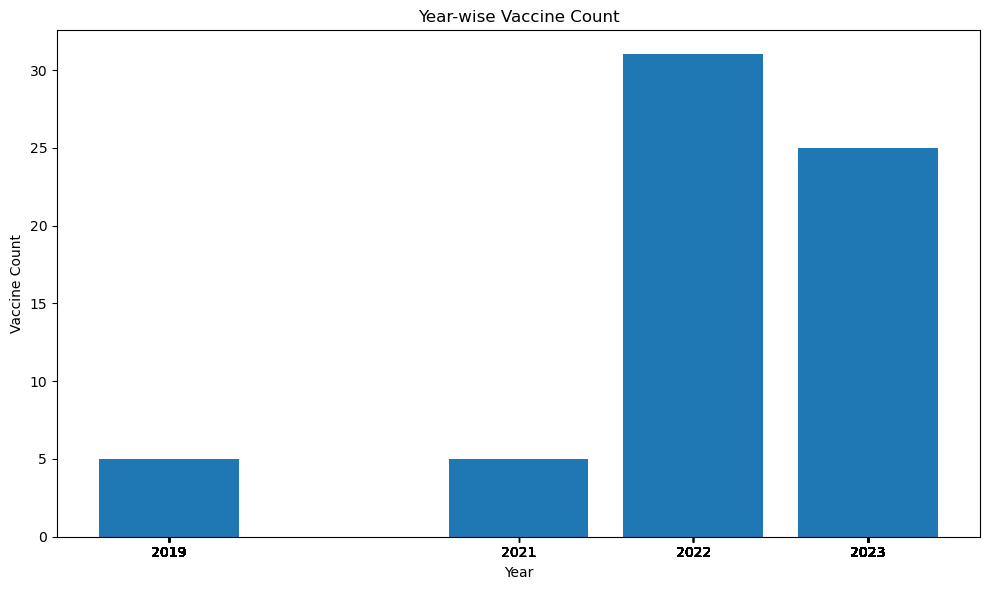

In [837]:
plt.figure(figsize=(10, 6))
plt.bar(age_group_counts['YEAR'], age_group_counts['VACCINE_COUNT'])
plt.title('Year-wise Vaccine Count')
plt.xlabel('Year')
plt.ylabel('Vaccine Count')
plt.xticks(age_group_counts['YEAR'])
plt.tight_layout()
plt.show()

In [742]:
# Calculate the total number of vaccines recommended per year and country
total_vaccines_per_year_country = age_group_counts.groupby(['COUNTRYNAME', 'YEAR'])['VACCINE_COUNT'].sum().reset_index(name='TOTAL_VACCINES')
total_vaccines_per_year_country

,COUNTRYNAME,YEAR,TOTAL_VACCINES
0,Afghanistan,2023,24
1,Albania,2023,30
2,Algeria,2023,21
3,Andorra,2023,31
4,Angola,2023,27
...,...,...,...
208,Wallis and Futuna,2019,12
209,Yemen,2023,40
210,Zambia,2023,37
211,Zimbabwe,2023,38


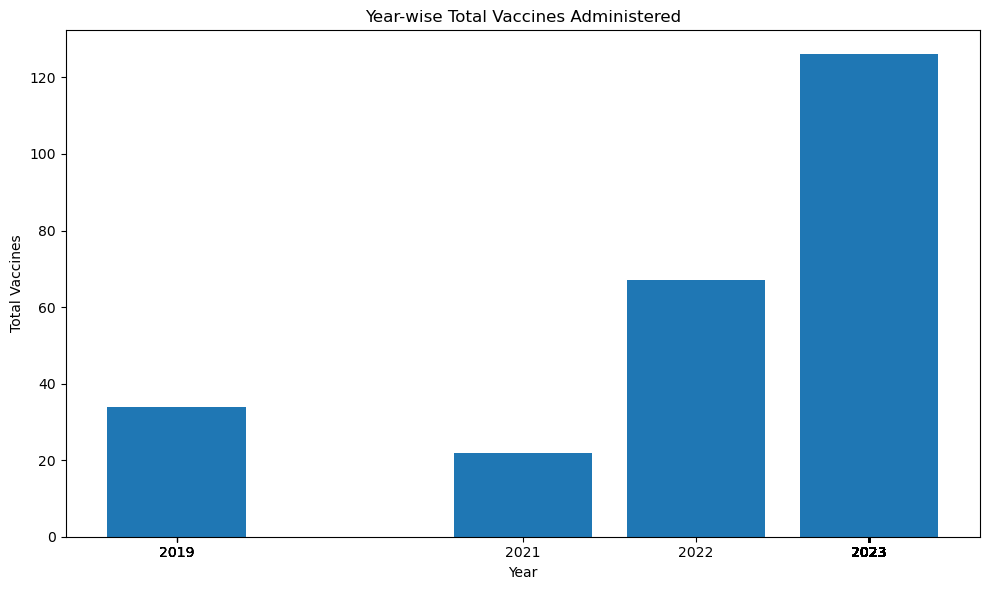

In [841]:
plt.figure(figsize=(10, 6))
plt.bar(total_vaccines_per_year_country['YEAR'], total_vaccines_per_year_country['TOTAL_VACCINES'])
plt.title('Year-wise Total Vaccines Administered')
plt.xlabel('Year')
plt.ylabel('Total Vaccines')
plt.xticks(total_vaccines_per_year_country['YEAR'])
plt.tight_layout()
plt.show()

In [843]:
# Calculate the number of vaccines per target populatio
vaccines_per_targetpop = vaccine_schedule_data.groupby('VACCINECODE')['TARGETPOP'].nunique()
vaccines_per_targetpop

VACCINECODE
ANTHRAX       1
AP            2
BCG           4
CCHF          1
CHOLERA       3
             ..
TYPHOID_PS    3
VARICELLA     6
VITAMINA      3
YF            3
ZOSTER        3
Name: TARGETPOP, Length: 86, dtype: int64

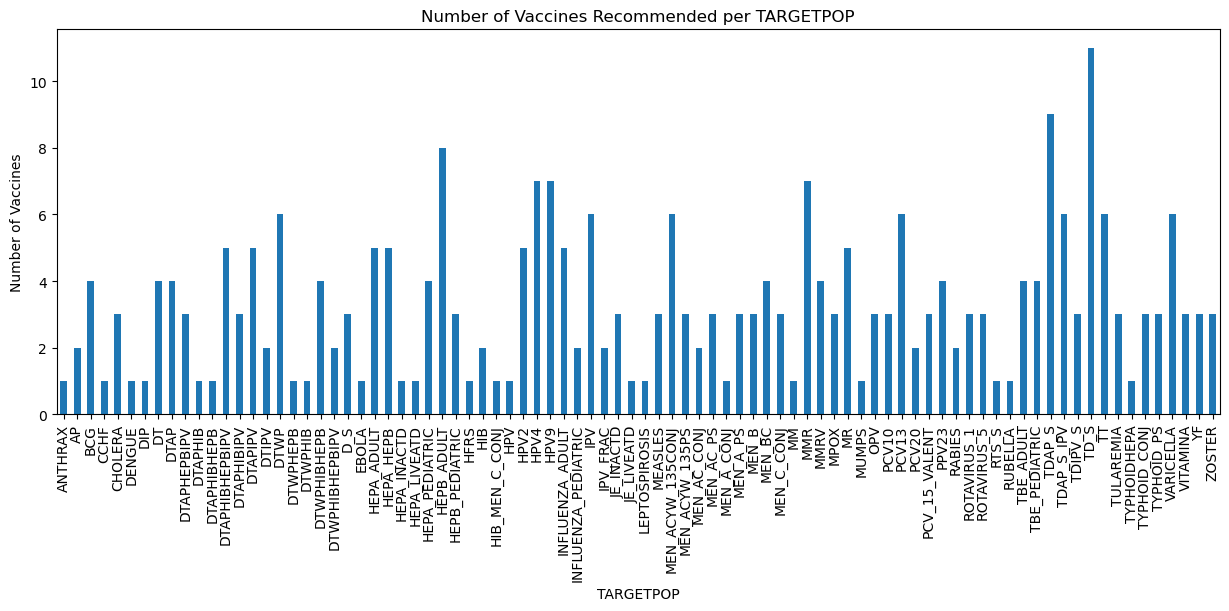

In [668]:
# Plot the number of vaccines per target popoulation
plt.figure(figsize=(15, 5))
vaccines_per_targetpop.plot(kind='bar')
plt.xlabel('TARGETPOP')
plt.ylabel('Number of Vaccines')
plt.title('Number of Vaccines Recommended per TARGETPOP')
plt.show()

### To Save Excel files

In [845]:
coverage_data.to_excel("coverage_data1.xlsx", index=False)

In [848]:
incidence_rate_data.to_excel("incidence_rate_data2.xlsx", index=False)

In [850]:
reported_cases_data.to_excel("reported_cases_data3.xlsx", index=False)

In [852]:
vaccine_introduction_data.to_excel("vaccine_introduction_data4.xlsx", index=False)

In [854]:
vaccine_schedule_data.to_excel("vaccine_schedule_data5.xlsx", index=False)